# Coursework 3

### PLAGIARISM/COLLUSION DECLARATION

 

Coursework submitted for assessment must be the original work of you and your group. Assignments are subjected to regular checks for plagiarism and/or collusion. Plagiarism is the presentation of another person’s thoughts or words (those outside your group) as if they were your own. Collusion involves obtaining help from someone outside your group to complete your work. In preparing your coursework, you should not seek help, or copy from any other person or source, including the

Internet, without proper and explicit acknowledgement.

 

There is a procedure in place for you to declare individual contributions within your group for courswork. You must declare the contributions fairly and accurately.

 

You must not disclose your solutions or insights related to coursework with anyone else, including future students or the Internet.

 

By acknowledging the the statements above, you are declaring that both this and all subsequent pieces of coursework are, and will remain, the original work of you and your group.

 

* Submissions will not be accepted without the aforementioned declaration.

 

* Members of a group are deemed to have collective responsibility for the integrity for work submitted and are liable for any penalty imposed, proportionate to their contributions.

In [1]:
using JLD2,FileIO, LinearAlgebra, FFTW, Wavelets, Images, LinearOperators, IterativeSolvers, DSP

In [2]:
Base.@kwdef mutable struct CourseWork_3
    
    CID::Int
    Plagiarism_declare::Union{Missing,Bool}
    Demo_willing::Union{Missing,Bool}
    
    # 8.1 Proximal Operator
    
    Q8_1_a_data_z::Vector
    Q8_1_a_data_gamma::Float64
    
    Q8_1_a_ans_x::Union{Missing,Vector}
    
    Q8_1_b_data_z::Vector
    Q8_1_b_data_gamma::Float64
    
    Q8_1_b_ans_x::Union{Missing,Vector}
    
    # 8.2  MRI CS Recovery: ADMM
    
    Q8_2_data_y::Vector
    Q8_2_data_Omega::Matrix
    Q8_2_data_X2_ini::Matrix
    Q8_2_data_X3_ini::Matrix
    Q8_2_data_X4_ini::Matrix
    Q8_2_data_X5_ini::Matrix
    Q8_2_data_U2_ini::Matrix
    Q8_2_data_U3_ini::Matrix
    Q8_2_data_U4_ini::Matrix
    Q8_2_data_U5_ini::Matrix
    Q8_2_data_lambda1::Float64
    Q8_2_data_lambda2::Float64
    Q8_2_data_lambda3::Float64
    Q8_2_data_rho::Float64
    
    Q8_2_1_ans_X1::Union{Missing,Matrix}
    
    Q8_2_2_ans_X2::Union{Missing,Matrix}
    Q8_2_2_ans_X3::Union{Missing,Matrix}
    Q8_2_2_ans_X4::Union{Missing,Matrix}
    Q8_2_2_ans_X5::Union{Missing,Matrix}
    
    Q8_2_3_ans_U2::Union{Missing,Matrix}
    Q8_2_3_ans_U3::Union{Missing,Matrix}
    Q8_2_3_ans_U4::Union{Missing,Matrix}
    Q8_2_3_ans_U5::Union{Missing,Matrix}
    
    Q8_2_4_ans_Xhat::Union{Missing,Matrix}
    
    # 8.3. Blind Deconvolution: Convex Relaxation
    
    Q8_3_data_y::Vector
    Q8_3_data_X2_ini::Matrix
    Q8_3_data_X3_ini::Matrix
    Q8_3_data_X4_ini::Matrix
    Q8_3_data_U2_ini::Matrix
    Q8_3_data_U3_ini::Matrix
    Q8_3_data_U4_ini::Matrix
    Q8_3_data_lambda1::Float64
    Q8_3_data_lambda2::Float64
    Q8_3_data_lambda3::Float64
    
    Q8_3_2_ans_X1::Union{Missing,Matrix}
    
    Q8_3_3_ans_X2::Union{Missing,Matrix}
    Q8_3_3_ans_X3::Union{Missing,Matrix}
    Q8_3_3_ans_X4::Union{Missing,Matrix}
    
    Q8_3_4_ans_U2::Union{Missing,Matrix}
    Q8_3_4_ans_U3::Union{Missing,Matrix}
    Q8_3_4_ans_U4::Union{Missing,Matrix}
    
    Q8_3_5_ans_Xhat::Union{Missing,Matrix}
    
    # Blind Deconvolution
    
    Q8_4_data_y::Vector
    Q8_4_data_x1ini::Vector
    Q8_4_data_x2ini::Vector
    Q8_4_data_x3ini::Vector
    Q8_4_data_h1ini::Vector
    Q8_4_data_h2ini::Vector
    Q8_4_data_alpha::Float64
    
    Q8_4_1_a_ans_H::Union{Missing,Matrix}
    Q8_4_1_b_ans_tau::Union{Missing,Float64}
    Q8_4_1_c_ans_x1::Union{Missing,Vector}
    Q8_4_1_c_ans_x2::Union{Missing,Vector}
    Q8_4_1_c_ans_x3::Union{Missing,Vector}
    Q8_4_1_d_ans_subg::Union{Missing,Vector}
    
    Q8_4_2_a_ans_H::Union{Missing,Matrix}
    Q8_4_2_b_ans_tau::Union{Missing,Float64}
    Q8_4_2_c_ans_h1::Union{Missing,Vector}
    Q8_4_2_c_ans_h2::Union{Missing,Vector}
    Q8_4_2_d_ans_subg::Union{Missing,Vector}
    
    Q8_4_3_ans_subg::Union{Missing,Vector}
    
    Q8_4_4_ans_x1::Union{Missing,Vector}
    Q8_4_4_ans_h1::Union{Missing,Vector}
    
    
    
end

CourseWork_3

In [3]:
# Download and upload data from JLD file, refer to https://juliaio.github.io/JLD2.jl/dev/

 

# Example

data = JLD2.load("Jacky Jiang1860908StudentFile.jld2")
CW3_DATA = data["CourseWork_3"]

CW3_DATA.CID = 01860908
CW3_DATA.Plagiarism_declare = true
CW3_DATA.Demo_willing = true


true

## 8.1. Proximal Operator (Continued)


### 1. (a)

In this question, the minimization problem is 
$$
\begin{equation*}
    min \ \frac{1}{2}\|x\|^2+\frac{1}{2\gamma}\|x-z\|^2
\end{equation*}
$$
By finding the derivatvies of the objective function and set that to zero, we get 
$$
\begin{equation*}
    x+\frac{1}{\gamma}(x-z) = 0
\end{equation*}
$$
Since $x$ is a vector in this case, then 
$$
\begin{equation*}
    (\gamma +1)x = z \ \ \rightarrow \ \ x = \frac{1}{\gamma + 1}z
\end{equation*}
$$

In [4]:
function Find_min_x_81(gamma, z)
    x = inv(gamma+1)*z
    return x
end

CW3_DATA.Q8_1_a_ans_x = Find_min_x_81(CW3_DATA.Q8_1_a_data_gamma, CW3_DATA.Q8_1_a_data_z)


96-element Vector{Float64}:
 0.2624635312153896
 0.614848739602146
 0.49463245943318945
 0.3702445611040225
 0.0662416692287618
 0.1562265037012609
 0.18880690291760427
 0.44206908016508273
 0.6584382961297108
 0.020240218847314452
 ⋮
 0.23830752622638096
 0.14145616983611756
 0.12108550456239515
 0.08655553530486029
 0.17230371264672018
 0.2505322741867927
 0.3458679913060485
 0.6587143610566094
 0.08296344650080363

### 1. (b)

Due to the $l_2$ norm of $x$ in the objective function, it's really hard to get the closed form solution, therefore we are using proximal gradient algorithm in this case. Since we don't want to calculate the minimization problem that includes the $\|x\|_2$, we set $f(x) = \|x\|_2$, and $g(x) = \frac{1}{2\gamma}\|x-z\|^2$, let the stepsize be $\lambda$, then the proximal operator is 
$$
\begin{equation*}
    g(x)+\frac{1}{2\lambda}\|x-(x^{l-1}-\lambda \nabla \|x^{l-1}\|_2)\|^2 = \frac{1}{2\gamma}\|x-z\|^2+\frac{1}{2\lambda}\|x-(x^{l-1}-\lambda \nabla \|x^{l-1}\|_2)\|^2
\end{equation*}
$$
Now considering about the gradient of $\|x\|_2$, since $\|x\|_2 = (x^{\mathsf{T}}x)^{\frac{1}{2}}$, then the gradient is 
$$
\begin{equation*}
    \nabla (x^{\mathsf{T}}x)^{\frac{1}{2}} = 2\cdot\frac{1}{2}x(x^{\mathsf{T}}x)^{-\frac{1}{2}} = \frac{x}{\|x\|_2}
\end{equation*}
$$
Therefore the proximal operator becomes
$$
\begin{equation*}
    \frac{1}{2\gamma}\|x-z\|^2+\frac{1}{2\lambda}\|x-(x^{l-1}-\lambda \frac{x^{l-1}}{\|x^{l-1}\|_2})\|^2
\end{equation*}
$$
let $z^{l-1}=x^{l-1}-\lambda \frac{x^{l-1}}{\|x^{l-1}\|_2}$, then the minimization of this proximal operator becomes 
$$
\begin{equation*}
    argmin \ \ \frac{1}{2\gamma}\|x-z\|^2+\frac{1}{2\lambda}\|x-z^{l-1}\|^2
\end{equation*}
$$
This is a normal least square problem, which can be found by finding the gradient, which is 
$$
\begin{equation*}
    \frac{1}{\gamma}(x-z)+\frac{1}{\lambda}(x-z^{l-1})
\end{equation*}
$$
Therefore the updating proximal operator is 
$$
\begin{equation*}
    x = \frac{1}{\gamma + \lambda}(\lambda z +\gamma z^{l-1})
\end{equation*}
$$
Then the $x$ can be found iteratively by this algorithm until it converges. Let the stepsize be $\frac{1}{2n}$, where $n$ is the length of vector $x$.

In [5]:
function gradient_of_fx(x)
    x_hat = (norm(x) != 0) ? x/norm(x) : zeros(length(x))
    return x_hat
end

function update_proximal_operator(gamma, lambda, z, zl)
    x_hat = inv(gamma+lambda)*(lambda*z+gamma*zl)
    return x_hat
end

function find_x_82(gamma, z)
    n = length(z)
    lambda = inv(2*n)
    x_dif = Inf
    x_l = copy(z)
    x_cur = copy(x_l)
    while(x_dif > 0.00001)
        z_l = x_l - lambda*gradient_of_fx(x_l)
        x_l = update_proximal_operator(gamma, lambda, z, z_l)
        x_dif = norm(x_l-x_cur)
        x_cur = copy(x_l)
    end
    return x_l
end 

CW3_DATA.Q8_1_b_ans_x = find_x_82(CW3_DATA.Q8_1_b_data_gamma, CW3_DATA.Q8_1_b_data_z)

30-element Vector{Float64}:
 -0.11506665370923998
  0.23115823274792155
  0.24283750635678858
 -2.4802043120859425
  0.1196541931142933
  0.9209651193704305
 -1.6283857821341943
 -0.761952548569502
  0.08001676713302026
  1.327108322284495
  ⋮
 -0.4548234299083101
 -0.6836077073298604
  1.2218204330459392
  0.5113547785520725
 -1.157816001282813
 -0.06432866290799044
  0.05007483733160703
 -0.17199375971968645
  0.2712561789815965

## 8.2. MRI CS Recovery: ADMM

### 1

Considering about $<u, z-x>+\frac{\rho}{2}\|z-x\|^2$ in general, it can be reformulated as 
$$
\begin{equation*}
    \frac{\rho}{2}\left(\|z-x\|^2+2\cdot\frac{u^{\mathsf{T}}}{\rho}(z-x)+\frac{\|u\|^2}{\rho^2}-\frac{\|u\|^2}{\rho^2}\right)
\end{equation*}
$$
which can be written as 
$$
\begin{equation*}
    \frac{\rho}{2}\|z-x+\frac{u}{\rho}\|^2-\frac{\|u\|^2}{2\rho}
\end{equation*}
$$ 
Therefore, the augmented Lagrangian can be reformulated as 
$$
\begin{equation*}
    \frac{1}{2}\|y-AX_1\|^2+\lambda _1\|WX_2\|_1+\lambda _2\|DX_3\|_1+\lambda _3\|X_4\|_F^2+\lambda _3\|X_5\|_F^2
\end{equation*}
\\
\begin{equation*}
    \frac{\rho}{2}\|X_2-X_1+\frac{1}{\rho}U_2\|_F^2 -\frac{1}{2\rho}\|U_2\|_F^2 + \frac{\rho}{2}\|X_3-X_1+\frac{1}{\rho}U_3\|_F^2 -\frac{1}{2\rho}\|U_3\|_F^2 +
\end{equation*}
\\
\begin{equation*} 
    \frac{\rho}{2}\|X_4-FX_1+\frac{1}{\rho}U_4\|_F^2-\frac{1}{2\rho}\|U_4\|_F^2 + \frac{\rho}{2}\|X_5-FX_1^{\mathsf{T}}+\frac{1}{\rho}U_5\|_F^2 - \frac{1}{2\rho}\|U_5\|_F^2
\end{equation*}
$$
when all other variables are fixed, and we want to find the new $X_1$, we need to solve the minimization problem
$$
\begin{equation*}
    \frac{1}{2}\|y-AX_1\|^2 + \frac{\rho}{2}\|X_2-X_1+\frac{1}{\rho}U_2\|_F^2 + \frac{\rho}{2}\|X_3-X_1+\frac{1}{\rho}U_3\|_F^2 + \frac{\rho}{2}\|X_4-FX_1+\frac{1}{\rho}U_4\|_F^2 + \frac{\rho}{2}\|X_5-FX_1^{\mathsf{T}}+\frac{1}{\rho}U_5\|_F^2
\end{equation*}
$$
This minimization problem can be solved by finding the gradient of the least square problems, however, to find the gradient of $\frac{\rho}{2}\|X_5-FX_1^{\mathsf{T}}+\frac{1}{\rho}U_5\|_F^2$ is a little bit more complex. Assuming $\hat{X_5} = X_5++\frac{1}{\rho}U_5$, then $\|\hat{X_5}-FX_1^{\mathsf{T}}\|_F^2$ can be written as 
$$
\begin{equation*}
    \|\hat{X_5}-FX_1^{\mathsf{T}}\|_F^2 = trace((\hat{X_5}-FX_1^{\mathsf{T}})^{\mathsf{T}}(\hat{X_5}-FX_1^{\mathsf{T}})) = trace(\hat{X_5^{\mathsf{T}}}\hat{X_5}-X_1F^{\mathsf{T}}\hat{X_5}-\hat{X_5^{\mathsf{T}}}FX_1^{\mathsf{T}}+X_1F^{\mathsf{T}}FX_1^{\mathsf{T}})
\end{equation*}
$$
Since $trace(A+B) = trace(A) + trace(B)$, and $trace(A^{\mathsf{T}}) = trace(A)$, then the above equation can be rewritten as 
$$
\begin{equation*}
    trace(\hat{X_5^{\mathsf{T}}}\hat{X_5})-2trace(X_1F^{\mathsf{T}}\hat{X_5})+trace(X_1F^{\mathsf{T}}FX_1^{\mathsf{T}})
\end{equation*}
$$
So we try to find the gradient of this trace function over $X_1$, therefore the first term can be eliminated, and first considering about the derivation of the second term. Assuming that 
$$
\begin{equation*}
    X_1 = 
    \begin{bmatrix}
        x_{11} & x_{12} & \cdots & x_{1n}\\
        x_{21} & x_{22} & \cdots & x_{2n}\\
        \vdots & \vdots & &\\
        x_{n1} & x_{n2} & \cdots & x_{nn}
    \end{bmatrix} \ \ \ 
    F^{\mathsf{T}}\hat{X_5} = 
    \begin{bmatrix}
        \hat{a_{11}} & \hat{a_{12}} & \cdots & \hat{a_{1n}}\\
        \hat{a_{21}} & \hat{a_{22}} & \cdots & \hat{a_{2n}}\\
        \vdots & \vdots & &\\
        \hat{a_{n1}} & \hat{a_{n2}} & \cdots & \hat{a_{nn}}
    \end{bmatrix}
\end{equation*}
$$
The the above trace function can be represented as 
$$
\begin{equation*}
    f = trace\left(
        \begin{bmatrix}
        x_{11} & x_{12} & \cdots & x_{1n}\\
        x_{21} & x_{22} & \cdots & x_{2n}\\
        \vdots & \vdots & &\\
        x_{n1} & x_{n2} & \cdots & x_{nn}
    \end{bmatrix}
    \begin{bmatrix}
        \hat{a_{11}} & \hat{a_{12}} & \cdots & \hat{a_{1n}}\\
        \hat{a_{21}} & \hat{a_{22}} & \cdots & \hat{a_{2n}}\\
        \vdots & \vdots & &\\
        \hat{a_{n1}} & \hat{a_{n2}} & \cdots & \hat{a_{nn}}
    \end{bmatrix}
    \right) = trace\left(
        \begin{bmatrix}
            \sum _{i=1}^nx_{1i}\hat{a_{i1}} & \sum _{i=1}^nx_{1i}\hat{a_{i2}} & \cdots & \sum _{i=1}^nx_{1i}\hat{a_{in}}\\
            \sum _{i=1}^nx_{2i}\hat{a_{i1}} & \sum _{i=1}^nx_{2i}\hat{a_{i2}} & \cdots & \sum _{i=1}^nx_{2i}\hat{a_{in}}\\
            \vdots & \vdots & &\\
            \sum _{i=1}^nx_{ni}\hat{a_{i1}} & \sum _{i=1}^nx_{ni}\hat{a_{i2}} & \cdots & \sum _{i=1}^nx_{ni}\hat{a_{in}}
        \end{bmatrix}
    \right)
\end{equation*}
$$
which is 
$$
\begin{equation*}
    f = \sum _{i=1}^nx_{1i}\hat{a_{i1}} + \sum _{i=1}^nx_{2i}\hat{a_{i2}} + \cdots + \sum _{i=1}^nx_{ni}\hat{a_{in}}
\end{equation*}
$$
Since the gradient of a function with respect to a matrix is defined as 
$$
\begin{equation*}
    \frac{\partial f}{\partial X_1} = 
    \begin{bmatrix}
        \frac{\partial f}{\partial x_{11}} & \frac{\partial f}{\partial x_{12}} & \cdots & \frac{\partial f}{\partial x_{1n}}\\
        \frac{\partial f}{\partial x_{21}} & \frac{\partial f}{\partial x_{22}} & \cdots & \frac{\partial f}{\partial x_{2n}}\\
        \vdots & \vdots & &\\
        \frac{\partial f}{\partial x_{n1}} & \frac{\partial f}{\partial x_{n2}} & \cdots & \frac{\partial f}{\partial x_{nn}}
    \end{bmatrix}
\end{equation*}
$$
put the representation of $f$ into the above equation, we could see that 
$$
\begin{equation*}
    \frac{\partial f}{\partial X_1} = 
    \begin{bmatrix}
        \hat{a_{11}} & \hat{a_{21}} & \cdots & \hat{a_{n1}}\\
        \hat{a_{12}} & \hat{a_{22}} & \cdots & \hat{a_{n2}}\\
        \vdots & \vdots & &\\
        \hat{a_{1n}} & \hat{a_{2n}} & \cdots & \hat{a_{nn}}
    \end{bmatrix} = 
    \left(F^{\mathsf{T}}\hat{X_5}\right)^{\mathsf{T}} = \hat{X_5}^{\mathsf{T}}F
\end{equation*}
$$
Therefore the gradient of $trace(X_1F^{\mathsf{T}}\hat{X_5})$ is $\hat{X_5}^{\mathsf{T}}F$, now looking at the gradient of $trace(X_1F^{\mathsf{T}}FX_1^{\mathsf{T}})$, first assuming that 
$$
\begin{equation*}
    X_1 = 
    \begin{bmatrix}
        x_{11} & x_{12} & \cdots & x_{1n}\\
        x_{21} & x_{22} & \cdots & x_{2n}\\
        \vdots & \vdots & &\\
        x_{n1} & x_{n2} & \cdots & x_{nn}
    \end{bmatrix} \ \ \ 
    F = 
    \begin{bmatrix}
        a_{11} & a_{12} & \cdots & a_{1n}\\
        a_{21} & a_{22} & \cdots & a_{2n}\\
        \vdots & \vdots & &\\
        a_{m1} & a_{m2} & \cdots & a_{mn}
    \end{bmatrix}
\end{equation*}
$$
Then we could see that 
$$
\begin{equation*}
    FX_1^{\mathsf{T}} = 
    \begin{bmatrix}
        \sum _{i=1}^na_{1i}x_{1i} & \sum _{i=1}^na_{1i}x_{2i} & \cdots & \sum _{i=1}^na_{1i}x_{ni}\\
        \sum _{i=1}^na_{2i}x_{1i} & \sum _{i=1}^na_{2i}x_{2i} & \cdots & \sum _{i=1}^na_{2i}x_{ni}\\
        \vdots & \vdots & &\\
        \sum _{i=1}^na_{mi}x_{1i} & \sum _{i=1}^na_{mi}x_{2i} & \cdots & \sum _{i=1}^na_{mi}x_{ni}
    \end{bmatrix}
\end{equation*}
$$
Therefore, it can be seen that the trace of $X_1F^{\mathsf{T}}FX_1^{\mathsf{T}}$ is 
$$
\begin{equation*}
    f = \sum _{j=1}^m\left(\sum _{i=1}^na_{ji}x_{1i}\right)^2+\sum _{j=1}^m\left(\sum _{i=1}^na_{ji}x_{2i}\right)^2+\cdots + \sum _{j=1}^m\left(\sum _{i=1}^na_{ji}x_{ni}\right)^2
\end{equation*}
$$
Therefore, the gradient of this trace function over $X_1$ is 
$$
\begin{equation*}
\begin{bmatrix}
    2\sum _{j=1}^ma_{j1}\left(\sum _{i=1}^na_{ji}x_{1i}\right) & 2\sum _{j=1}^ma_{j2}\left(\sum _{i=1}^na_{ji}x_{1i}\right) & \cdots & 2\sum _{j=1}^ma_{jn}\left(\sum _{i=1}^na_{ji}x_{1i}\right)\\
    2\sum _{j=1}^ma_{j1}\left(\sum _{i=1}^na_{ji}x_{2i}\right) & 2\sum _{j=1}^ma_{j2}\left(\sum _{i=1}^na_{ji}x_{2i}\right) & \cdots & 2\sum _{j=1}^ma_{jn}\left(\sum _{i=1}^na_{ji}x_{2i}\right)\\
    \vdots & \vdots & &\\
    2\sum _{j=1}^ma_{j1}\left(\sum _{i=1}^na_{ji}x_{ni}\right) & 2\sum _{j=1}^ma_{j2}\left(\sum _{i=1}^na_{ji}x_{ni}\right) & \cdots & 2\sum _{j=1}^ma_{jn}\left(\sum _{i=1}^na_{ji}x_{ni}\right)
\end{bmatrix}
\end{equation*}
$$
It can be seen this is exactly same as 
$$
\begin{equation*}
    (2F^{\mathsf{T}}FX_1^{\mathsf{T}})^{\mathsf{T}} = 2X_1F^{\mathsf{T}}F
\end{equation*}
$$
Therefore, the gradient of $\frac{\rho}{2}\|X_5-FX_1^{\mathsf{T}}+\frac{1}{\rho}U_5\|_F^2$ is 
$$
\begin{equation*}
    -\rho \left(X_5+\frac{1}{\rho}U_5\right)^{\mathsf{T}}F+\rho X_1F^{\mathsf{T}}F
\end{equation*}
$$
So in general, the gradient of  
$$
\begin{equation*}
    \frac{1}{2}\|y-AX_1\|^2 + \frac{\rho}{2}\|X_2-X_1+\frac{1}{\rho}U_2\|_F^2 + \frac{\rho}{2}\|X_3-X_1+\frac{1}{\rho}U_3\|_F^2 + \frac{\rho}{2}\|X_4-FX_1+\frac{1}{\rho}U_4\|_F^2 + \frac{\rho}{2}\|X_5-FX_1^{\mathsf{T}}+\frac{1}{\rho}U_5\|_F^2
\end{equation*}
$$
is 
$$
\begin{equation*}
    -A^{\mathsf{T}}(y-AX_1)-\rho(X_2+\frac{1}{\rho}U_2-X_1)-\rho(X_3+\frac{1}{\rho}U_3-X_1)-\rho F^{\mathsf{T}}(X_4+\frac{1}{\rho}U_4-FX_1)-\rho(X_5+\frac{1}{\rho}U_5)^{\mathsf{T}}F+\rho X_1F^{\mathsf{T}}F
\end{equation*}
$$
If we set the gradient equal to zero, then we could reformulated this as 
$$
\begin{equation*}
    A^{\mathsf{T}}AX_1+2\rho X_1+\rho F^{\mathsf{T}}FX_1+\rho X_1F^{\mathsf{T}}F = A^{\mathsf{T}}y+\rho X_2+U_2+\rho X_3+U_3+\rho F^{\mathsf{T}}X_4+F^{\mathsf{T}}U_4+\rho X_5^{\mathsf{T}}F+U_5^{\mathsf{T}}F
\end{equation*}
$$
It can be seen this form is quite similar to the form that can be solve by conjugate gradient method, but $\rho X_1F^{\mathsf{T}}F$ makes it be more complex. To considering about this, based on property in CW1:
$$
\begin{equation*}
    Y = AXB \ \ \rightarrow \ \ vect(Y) = (B^{\mathsf{T}}\otimes A)vect(X)
\end{equation*}
$$
we could know that 
$$
\begin{equation*}
    vect(Aadj(A(vect(X_1))))+2\rho\cdot vect(X_1)+\rho(I\otimes F^{\mathsf{T}}F+F^{\mathsf{T}}F\otimes I)vect(X_1)= vect\left(A^{\mathsf{T}}y+\rho X_2+U_2+\rho X_3+U_3+\rho F^{\mathsf{T}}X_4+F^{\mathsf{T}}U_4+\rho X_5^{\mathsf{T}}F+U_5^{\mathsf{T}}F\right)
\end{equation*}
$$
So based on this, we could use the cg function to iteratively solve for $X_1$, the only thing unknown now is the matrix representation of F, since in our case, we want 
$$
\begin{equation*}
    FX_1 = X_{1(2:n,1:n)}-X_{1(1:n-1, 1:n)} = \left(
        \begin{bmatrix}
            0 & 1 & 0 & \cdots & 0 & 0\\
            0 & 0 & 1 & \cdots & 0 & 0\\
            \vdots & \vdots &\vdots & & &\\
            0 & 0 & 0 & \cdots & 0 & 1
        \end{bmatrix}-
        \begin{bmatrix}
            1 & 0 & 0 & \cdots & 0 & 0\\
            0 & 1 & 0 & \cdots & 0 & 0\\
            \vdots & \vdots & \vdots & & &\\
            0 & 0 & 0 & \cdots & 1 & 0
        \end{bmatrix}
    \right)X_1
\end{equation*}
$$
So $F$ can be generated by this way.


In [6]:
### Functions for MRI operation ###
function Find_POmega_withoutmatrix(Omega, X)
    m, n = size(Omega)
    X_new = []
    for j in 1:n
        for i in 1:m
            X_new = (Omega[i, j] == 1) ? push!(X_new, X[i, j]) : X_new
        end
    end
    return X_new
end

function Find_MRI_operation(Omega, X)
    m, n = size(X)
    O_1 = FFTW.fft(X)
    O_2 = FFTW.fftshift(O_1)
    O_3 = Find_POmega_withoutmatrix(Omega, O_2)
    return O_3
end

function Adjoint_Subsampling(Omega, y)
    m, n = size(Omega)
    Z = zeros(ComplexF64, m, n)
    index = 1
    for j in 1:n
        for i in 1:m
            Z[i, j] = (Omega[i, j] == 0) ? 0 : y[index]
            index = (Omega[i, j] == 0) ? index : index+1
        end
    end
    return Z
end

function Find_Adjoint_MRI_withoutmatrix(Omega, y)
    m, n = size(Omega)
    O_1 = Adjoint_Subsampling(Omega, y)
    O_2 = FFTW.ifftshift(O_1)
    O_3 = FFTW.ifft(O_2)
    O_3 = real(O_3)
    return O_3
end

Find_Adjoint_MRI_withoutmatrix (generic function with 1 method)

In [7]:
### functions for vectorization and devectorization ###
function Vector2Matrix(v, m)
    mn = length(v)
    n = Int(mn/m)
    U = zeros(m, n)
    for i in 1:n
        U[:, i] = v[(i-1)*m+1 : (i-1)*m+m]
    end
    return U
end

function Matrix2Vector(X)
    m, n = size(X)
    x = zeros(m*n)
    for i in 1:n
        x[(i-1)*m+1 : (i-1)*m+m] = X[:, i]
    end
    return x
end
### functions for generate F, and I tensorproduct F^TF, and F^TF tensorproduct I ###
function gen_F(n)
    I_new = Matrix{Float64}(I(n))
    return I_new[2:end, 1:end]-I_new[1:end-1, 1:end]
end

# function gen_ItpFTFX(x, n)
#     out = zeros(n*n)
#     for i in 1:n*n
#         if i%n == 1
#             out[i] = x[i]-x[i+1]
#         elseif  i%n == 0
#             out[i] = x[i]-x[i-1]
#         else
#             out[i] = -x[i-1]+2*x[i]-x[i+1]
#         end
#     end
#     return out
# end

function gen_ItpFTFX(X, F)
    return F'*F*X
end

function gen_FTFtpIX(X, F)
    return X*(F'*F)
end

function Find_Ax(x, Omega, rho, F)
    m, n = size(Omega)
    X = Vector2Matrix(x, m)
    y = Find_MRI_operation(Omega, X)
    Ax = Find_Adjoint_MRI_withoutmatrix(Omega, y)+2*rho*X+rho*(gen_ItpFTFX(X, F)+gen_FTFtpIX(X, F))
    Ax_vec = Matrix2Vector(Ax)
    return Ax_vec
end

function Find_b(y, Omega, rho, X2, U2, X3, U3, X4, U4, X5, U5, F)
    B = Find_Adjoint_MRI_withoutmatrix(Omega, y) + rho*X2 + U2 + rho*X3 + U3 + rho*F'*X4 + F'*U4 + rho*X5'*F + U5'*F
    b = Matrix2Vector(B)
    return b
end

gen_F(512)


511×512 Matrix{Float64}:
 -1.0   1.0   0.0   0.0   0.0   0.0  …   0.0   0.0   0.0   0.0   0.0  0.0
  0.0  -1.0   1.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0  0.0
  0.0   0.0  -1.0   1.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0  0.0
  0.0   0.0   0.0  -1.0   1.0   0.0      0.0   0.0   0.0   0.0   0.0  0.0
  0.0   0.0   0.0   0.0  -1.0   1.0      0.0   0.0   0.0   0.0   0.0  0.0
  0.0   0.0   0.0   0.0   0.0  -1.0  …   0.0   0.0   0.0   0.0   0.0  0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0  0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0  0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0  0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0  0.0
  ⋮                             ⋮    ⋱                           ⋮    
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0  0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0  0.0
  0.0   0.0   0.

In [8]:
function Update_X1(Omega, rho, y, X2, U2, X3, U3, X4, U4, X5, U5, F)
    m, n = size(Omega)
    l = m*n
    A_linearoperator = LinearOperator(Float64, l, l, false, false, (Ax, x) -> Ax .= Find_Ax(x, Omega, rho, F))
    b = Find_b(y, Omega, rho, X2, U2, X3, U3, X4, U4, X5, U5, F)
    x1_out = cg(A_linearoperator, b)
    X1 = Vector2Matrix(x1_out, m)
    return X1
end
rho_test = 15
# CW3_DATA.Q8_2_data_rho
CW3_DATA.Q8_2_1_ans_X1 = Update_X1(CW3_DATA.Q8_2_data_Omega, CW3_DATA.Q8_2_data_rho, CW3_DATA.Q8_2_data_y, CW3_DATA.Q8_2_data_X2_ini, CW3_DATA.Q8_2_data_U2_ini, CW3_DATA.Q8_2_data_X3_ini, CW3_DATA.Q8_2_data_U3_ini, CW3_DATA.Q8_2_data_X4_ini, CW3_DATA.Q8_2_data_U4_ini, CW3_DATA.Q8_2_data_X5_ini, CW3_DATA.Q8_2_data_U5_ini, gen_F(512))


512×512 Matrix{Float64}:
 -0.881166    0.362474   -0.246422   …   0.363164    0.706823    0.817808
 -0.489621   -0.2676      0.279745      -0.395081    0.478084    0.102871
  0.115661   -0.78095    -0.819783      -0.29352    -0.392561   -0.306875
  0.646594   -0.142408   -0.274504      -0.122267   -0.0909377  -0.59303
 -0.783473   -0.568046   -0.807984       0.509108    0.234554   -0.206985
 -0.392756   -0.0818767  -0.774872   …   0.224652    0.704105   -3.53044e-5
 -0.955562   -0.154626    0.155495      -0.517917    0.0758975  -0.492832
 -0.390875   -0.869351    0.295717      -0.381852   -0.0904969  -0.237509
  0.072508    0.825181   -0.283049      -0.0296763   0.200936   -0.191218
 -0.222052    0.712468   -0.377812       0.0386511   0.224168   -0.212743
  ⋮                                  ⋱               ⋮          
 -0.10763     0.0728286   0.243454      -0.0516689   0.191229   -0.56836
 -0.0706393  -0.0345914  -0.424165      -0.343201   -0.218535   -0.280867
 -0.140314    0.118333

### 2

To update $X_2$, the function related to $X_2$ is 
$$
\begin{equation*}
    \lambda _1\|WX_2\|_1+\frac{\rho}{2}\|X_2-\left(X_1-\frac{1}{\rho}U_2\right)\|_F^2
\end{equation*}
$$
which can be solved by softthreshold method, similar for $X_3$. And for $X_4$, the terms related to it is 
$$
\begin{equation*}
    \lambda _3\|X_4\|_F^2+\frac{\rho}{2}\|X_4-FX_1+\frac{1}{\rho}U_4\|_F^2 = \lambda _3\|X_4\|_F^2+\frac{\rho}{2}\|X_4-（FX_1-\frac{1}{\rho}U_4）\|_F^2
\end{equation*}
$$
Therefore, finding the gradient of this equation and set it to zero, we get 
$$
\begin{equation*}
    2\lambda _3X_4+\rho (X_4-(FX_1-\frac{1}{\rho}U_4)) = 0 \ \ \rightarrow \ \ (2\lambda _3 + \rho)X_4 = \rho FX_1 - U_4
\end{equation*}
$$
It's similar to find the updated $X_5$, the terms related to it is 
$$
\begin{equation*}
    \lambda _3\|X_5\|_F^2+\frac{\rho}{2}\|X_5-FX_1^{\mathsf{T}}+\frac{1}{\rho}U_5\|_F^2
\end{equation*}
$$
Therefore, after finding the gradient of this equation and set it to zero we get 
$$
\begin{equation*}
    (2\lambda _3 + \rho)X_5 = \rho FX_1^{\mathsf{T}} - U_5
\end{equation*}
$$

$$
\begin{equation*}
    \sum _{m, n}\sqrt{X_4[m, n]^2+X_5[m, n]^2} + \frac{\rho}{2}\|X_4-Z\|^2
\end{equation*}
$$

In [9]:
wt = wavelet(WT.db4)

function update_X2(rho, X1, U2, lambda1)
    gamma = 1/rho
    Z = X1-gamma*U2
    Z_hat = dwt(Z, wt)
    X2_hat = sign.(Z_hat).*max.(abs.(Z_hat).-(gamma*lambda1), 0)
    X2 = idwt(X2_hat, wt)
    return X2
end

function update_X3(rho, X1, U3, lambda2)
    gamma = 1/rho
    Z = X1-gamma*U3
    Z_hat = dct(Z)
    X3_hat = sign.(Z_hat).*max.(abs.(Z_hat).-(gamma*lambda2), 0)
    X3 = idct(X3_hat)
    return X3
end

# function update_X4(rho, X1, F, U4, lambda3)
#     return inv(2*lambda3+rho)*(rho*F*X1-U4)
# end

# function update_X5(rho, X1, F, U5, lambda3)
#     return inv(2*lambda3+rho)*(rho*F*X1'-U5)
# end

# function find_gradient_fx_X4(x4, x5, lambda3)
#     return lambda3*x4/sqrt(x4^2+x5^2)
# end

# function update_proximalgradient_X4(rho, gamma, z, zl)
#     return inv(rho+inv(gamma))*(rho*z+inv(gamma)*zl)
# end

# function proximal_X4(rho, gamma, z, x5, lambda3)
#     x_l = rho*inv(lambda3+rho*x5)*z
#     # x_l = 0
#     x_cur = copy(x_l)
#     x_dif = Inf
#     itr = 1
#     while (x_dif > 0.01)
#         z_l = x_l - gamma*find_gradient_fx_X4(x_l, x5, lambda3)
#         x_l = update_proximalgradient_X4(rho, gamma, z, z_l)
#         x_dif = norm(x_cur-x_l)
#         x_cur = copy(x_l)
#         # println(itr)
#         itr += 1
#     end
#     return x_l
# end

# function update_X4(rho, X1, F, U4, X5, lambda3)
#     Z = F*X1-inv(rho)*U4
#     gamma = 1.5
#     m, n = size(U4)
#     X4 = zeros(m, n)
#     # for i in 1:m
#     #     for j in 1:n
#     #         X4[i, j] = proximal_X4(rho, gamma, Z[i, j], X5[i, j], lambda3)
#     #     end
#     # end
#     X4 = proximal_X4.(rho, gamma, Z, X5, lambda3)
#     # i = 1
#     # j = 2
#     # X4[i, j] = proximal_X4(rho, gamma, Z[i, j], X5[i, j], lambda3)
#     return X4
# end

# function update_X5(rho, X1, F, U5, X4, lambda3)
#     m, n = size(U5)
#     Z = X1'[2:n, 1:n]-X1'[1:n-1, 1:n]-inv(rho)*U5
#     gamma = 1.5
#     X5 = zeros(m, n)
#     # for i in 1:m
#     #     for j in 1:n
#     #         X4[i, j] = proximal_X4(rho, gamma, Z[i, j], X5[i, j], lambda3)
#     #     end
#     # end
#     X5 = proximal_X4.(rho, gamma, Z, X4, lambda3)
#     # i = 1
#     # j = 2
#     # X4[i, j] = proximal_X4(rho, gamma, Z[i, j], X5[i, j], lambda3)
#     return X5
# end 

function Gradient_of_fx_X4(X4, X5, lambda3)
    return lambda3*X4./sqrt.(X4.^2 .+ X5.^2)
end

function Proximal_gradient_X4(U4, F, X1, rho, gamma, Z)
    return inv(rho+1/gamma)*(1/gamma*Z+rho*F*X1-U4)
end

function update_X4(rho, X1, F, U4, X5, lambda3)
    m, n = size(U4)
    gamma = 1/(2*n)
    X4_l = F*X1
    X4_cur = copy(X4_l)
    X_dif = Inf
    while (X_dif > 0.01)
        Z_l = X4_l - gamma*Gradient_of_fx_X4(X4_l, X5, lambda3)
        X4_l = Proximal_gradient_X4(U4, F, X1, rho, gamma, Z_l)
        X_dif = norm(X4_l-X4_cur)
        X4_cur = copy(X4_l)
    end
    return X4_l
end

function Gradient_of_fx_X5(X5, X4, lambda3)
    return lambda3*X5./sqrt.(X4.^2 .+ X5.^2)
end

function Proximal_gradient_X5(U5, F, X1, rho, gamma, Z)
    return inv(rho+1/gamma)*(1/gamma*Z+rho*F*X1'-U5)
end

function update_X5(rho, X1, F, U5, X4, lambda3)
    m, n = size(U5)
    gamma = 1/(2*n)
    X5_l = F*X1'
    X5_cur = copy(X5_l)
    X_dif = Inf
    while (X_dif > 0.01)
        Z_l = X5_l - gamma*Gradient_of_fx_X5(X5_l, X4, lambda3)
        X5_l = Proximal_gradient_X5(U5, F, X1, rho, gamma, Z_l)
        X_dif = norm(X5_l-X5_cur)
        X5_cur = copy(X5_l)
    end
    return X5_l
end

# Cehck = Gradient_of_fx(CW3_DATA.Q8_2_data_X4_ini, CW3_DATA.Q8_2_data_X5_ini, CW3_DATA.Q8_2_data_lambda3)


# CW3_DATA.Q8_2_2_ans_X2 = update_X2(CW3_DATA.Q8_2_data_rho, CW3_DATA.Q8_2_1_ans_X1, CW3_DATA.Q8_2_data_U2_ini, CW3_DATA.Q8_2_data_lambda1)
# CW3_DATA.Q8_2_2_ans_X3 = update_X3(CW3_DATA.Q8_2_data_rho, CW3_DATA.Q8_2_1_ans_X1, CW3_DATA.Q8_2_data_U3_ini, CW3_DATA.Q8_2_data_lambda2)
# CW3_DATA.Q8_2_2_ans_X4 = update_X4(CW3_DATA.Q8_2_data_rho, CW3_DATA.Q8_2_1_ans_X1, gen_F(512), CW3_DATA.Q8_2_data_U4_ini, CW3_DATA.Q8_2_data_lambda3)
# CW3_DATA.Q8_2_2_ans_X5 = update_X5(CW3_DATA.Q8_2_data_rho, CW3_DATA.Q8_2_1_ans_X1, gen_F(512), CW3_DATA.Q8_2_data_U5_ini, CW3_DATA.Q8_2_data_lambda3)
CW3_DATA.Q8_2_2_ans_X2 = update_X2(CW3_DATA.Q8_2_data_rho, CW3_DATA.Q8_2_1_ans_X1, CW3_DATA.Q8_2_data_U2_ini, CW3_DATA.Q8_2_data_lambda1)
CW3_DATA.Q8_2_2_ans_X3 = update_X3(CW3_DATA.Q8_2_data_rho, CW3_DATA.Q8_2_1_ans_X1, CW3_DATA.Q8_2_data_U3_ini, CW3_DATA.Q8_2_data_lambda2)
CW3_DATA.Q8_2_2_ans_X4 = update_X4(CW3_DATA.Q8_2_data_rho, CW3_DATA.Q8_2_1_ans_X1, gen_F(512), CW3_DATA.Q8_2_data_U4_ini, CW3_DATA.Q8_2_data_X5_ini, CW3_DATA.Q8_2_data_lambda3)
CW3_DATA.Q8_2_2_ans_X5 = update_X5(CW3_DATA.Q8_2_data_rho, CW3_DATA.Q8_2_1_ans_X1, gen_F(512), CW3_DATA.Q8_2_data_U5_ini, CW3_DATA.Q8_2_2_ans_X4, CW3_DATA.Q8_2_data_lambda3)








511×512 Matrix{Float64}:
  1.23462     0.203093   -0.848501    …   0.366781   -0.402432    0.497126
 -0.50643     0.415891   -0.0704161      -0.176466    0.605203   -0.121895
 -0.1196     -0.339074   -0.101293       -0.104983   -1.21614     0.187388
 -1.01195     0.607061    0.841711       -0.476465    0.574179    0.283902
  1.1089     -0.753891    0.804958       -0.0258182  -0.089566    0.255324
  0.752809    0.953146    0.669017    …   0.0330521   0.229534   -0.799471
  0.164108    0.0465772  -1.8573          0.393138   -0.271934   -0.516479
 -0.317827   -0.02331     0.348491       -0.54493     0.402825    0.0140704
  0.71931     0.178437    0.110048        0.627611   -0.133677   -0.369741
  0.102553   -0.310453   -0.577763       -0.392383    0.652167    1.47926
  ⋮                                   ⋱               ⋮          
 -0.542427   -1.43711    -1.32898         0.0873415   0.400189    1.19715
 -0.312405    0.396871    0.801763       -0.500635   -0.598194   -0.623214
  0.073557

### 3

The update function of $U_2$ based on ADMM algorithm is 
$$
\begin{equation*}
    U_2^{k+1} = U_2^k+\rho(X_1^k-X_2^k)
\end{equation*}
$$
And the update function of $U_3$ should be 
$$
\begin{equation*}
    U_3^{k+1} = U_3^k+\rho(X_1^k-X_3^k)
\end{equation*}
$$
The update function of $U_4$ should be 
$$
\begin{equation*}
    U_4^{k+1} = U_4^k+\rho(FX_1^k-X_4^k)
\end{equation*}
$$
And the update function of $U_5$ should be 
$$
\begin{equation*}
    U_5^{k+1} = U_5^k+\rho(FX_1^{k\mathsf{T}}-X_5^k)
\end{equation*}
$$

In [10]:
function update_U2(U2_k, rho, X1_k, X2_k)
    return U2_k-rho*(X1_k-X2_k)
end

function update_U3(U3_k, rho, X1_k, X3_k)
    return U3_k-rho*(X1_k-X3_k)
end

function update_U4(U4_k, rho, F, X1_k, X4_k)
    return U4_k-rho*(F*X1_k-X4_k)
end

function update_U5(U5_k, rho, F, X1_k, X5_k)
    return U5_k-rho*(F*X1_k'-X5_k)
end

# function update_U_mri(U_old,X1, X_other)

#     difference = vec(X_other) - vec(X1)

#     vec_U = vec(U_old)

#     # Ensure that the random vector is orthogonal to the difference
#     U_orthogonal = vec_U - ((dot(vec_U, difference) / dot(difference, difference)) * difference)

#     U_new = reshape(U_orthogonal, size(U_old))

#     return U_new
# end

# function object_fun_U45(U2, F, X1, X2)
#     m,n = size(X1)
#     return sum(U2 .* (X2-F*X1))
# end

# function update_U45_mri(U_old, F, X1, X_45)
#     m,n = size(X1)
#     difference = vec(X_45) - vec(F*X1)

#     vec_U45 = vec(U_old)

#     # Ensure that the random vector is orthogonal to the difference
#     U45_orthogonal = vec_U45 - ((dot(vec_U45, difference) / dot(difference, difference)) * difference)

#     U45_new = reshape(U45_orthogonal, size(U_old))

#     return U45_new
# end

# function update_U2(U2, X1, X2)
#     return update_U_mri(U2, X1, X2)
# end

# function update_U3(U3, X1, X3)
#     return update_U_mri(U3, X1, X3)
# end

# function update_U4(U4, F, X1, X4)
#     return update_U45_mri(U4, F, X1, X4)
# end

# function update_U5(U5, F, X1, X5)
#     return update_U45_mri(U5, F, X1', X5)
# end
# CW3_DATA.Q8_2_3_ans_U2 = update_U2(CW3_DATA.Q8_2_data_U2_ini, CW3_DATA.Q8_2_data_rho, CW3_DATA.Q8_2_1_ans_X1, CW3_DATA.Q8_2_2_ans_X2)
# CW3_DATA.Q8_2_3_ans_U3 = update_U3(CW3_DATA.Q8_2_data_U3_ini, CW3_DATA.Q8_2_data_rho, CW3_DATA.Q8_2_1_ans_X1, CW3_DATA.Q8_2_2_ans_X3)
# CW3_DATA.Q8_2_3_ans_U4 = update_U4(CW3_DATA.Q8_2_data_U4_ini, CW3_DATA.Q8_2_data_rho, gen_F(512), CW3_DATA.Q8_2_1_ans_X1, CW3_DATA.Q8_2_2_ans_X4)
# CW3_DATA.Q8_2_3_ans_U5 = update_U5(CW3_DATA.Q8_2_data_U5_ini, CW3_DATA.Q8_2_data_rho, gen_F(512), CW3_DATA.Q8_2_1_ans_X1, CW3_DATA.Q8_2_2_ans_X5)

CW3_DATA.Q8_2_3_ans_U2 = update_U2(CW3_DATA.Q8_2_data_U2_ini, CW3_DATA.Q8_2_data_rho, CW3_DATA.Q8_2_1_ans_X1, CW3_DATA.Q8_2_2_ans_X2)
CW3_DATA.Q8_2_3_ans_U3 = update_U3(CW3_DATA.Q8_2_data_U3_ini, CW3_DATA.Q8_2_data_rho, CW3_DATA.Q8_2_1_ans_X1, CW3_DATA.Q8_2_2_ans_X3)
CW3_DATA.Q8_2_3_ans_U4 = update_U4(CW3_DATA.Q8_2_data_U4_ini, CW3_DATA.Q8_2_data_rho, gen_F(512), CW3_DATA.Q8_2_1_ans_X1, CW3_DATA.Q8_2_2_ans_X4)
CW3_DATA.Q8_2_3_ans_U5 = update_U5(CW3_DATA.Q8_2_data_U5_ini, CW3_DATA.Q8_2_data_rho, gen_F(512), CW3_DATA.Q8_2_1_ans_X1, CW3_DATA.Q8_2_2_ans_X5)

# CW3_DATA.Q8_2_3_ans_U2 = update_U2(CW3_DATA.Q8_2_data_U2_ini, CW3_DATA.Q8_2_1_ans_X1, CW3_DATA.Q8_2_2_ans_X2)
# CW3_DATA.Q8_2_3_ans_U3 = update_U3(CW3_DATA.Q8_2_data_U3_ini, CW3_DATA.Q8_2_1_ans_X1, CW3_DATA.Q8_2_2_ans_X3)
# CW3_DATA.Q8_2_3_ans_U4 = update_U4(CW3_DATA.Q8_2_data_U4_ini, gen_F(512), CW3_DATA.Q8_2_1_ans_X1, CW3_DATA.Q8_2_2_ans_X4)
# CW3_DATA.Q8_2_3_ans_U5 = update_U5(CW3_DATA.Q8_2_data_U5_ini, gen_F(512), CW3_DATA.Q8_2_1_ans_X1, CW3_DATA.Q8_2_2_ans_X5)

# CW3_DATA.Q8_2_3_ans_U2 = update_U_mri(CW3_DATA.Q8_2_data_U2_ini, CW3_DATA.Q8_2_1_ans_X1, CW3_DATA.Q8_2_2_ans_X2)
# CW3_DATA.Q8_2_3_ans_U3 = update_U_mri(CW3_DATA.Q8_2_data_U3_ini, CW3_DATA.Q8_2_1_ans_X1, CW3_DATA.Q8_2_2_ans_X3)
# CW3_DATA.Q8_2_3_ans_U4 = update_U45_mri(CW3_DATA.Q8_2_data_U4_ini, gen_F(512), CW3_DATA.Q8_2_1_ans_X1, CW3_DATA.Q8_2_2_ans_X4)
# CW3_DATA.Q8_2_3_ans_U5 = update_U45_mri(CW3_DATA.Q8_2_data_U5_ini, gen_F(512), CW3_DATA.Q8_2_1_ans_X1', CW3_DATA.Q8_2_2_ans_X5)



511×512 Matrix{Float64}:
 -0.0899539   -0.0205724    0.0682289   …   0.0778058  -0.0460996
  0.0253205   -0.0229671    0.016231       -0.0553151   0.0236481
 -0.0140024    0.0215553    0.0242403       0.0884449  -0.0659872
  0.0905405   -0.0757994   -0.044916       -0.0548394  -0.0705524
 -0.0940991    0.0439479   -0.109703        0.0265263  -0.0834664
 -0.136019    -0.106751    -0.0205052   …  -0.056533    0.0691312
 -0.0392759   -0.00575936   0.123946        0.0331712   0.0740415
  0.0327556   -0.00257763  -0.0330081      -0.0890824  -0.0895034
 -0.094768    -0.10552     -0.0819902       0.0910123   0.103625
 -0.0236235    0.0776181    0.045329       -0.170921   -0.0762235
  ⋮                                     ⋱   ⋮          
  0.0223377    0.0972653    0.0856956      -0.119289   -0.10511
  0.0843025   -0.108989    -0.100936        0.0504603   0.0715363
 -0.0280746    0.0528584   -0.00385262     -0.012495   -0.000393733
 -0.0532597    0.0877417    0.104583    …  -0.105577   -0.0931

### 4

The primal residual in this case is 
$$
\begin{equation*}
\begin{align*}
    r_2^{k+1} &= X_1^{k+1}-X_2^{k+1}\\
    r_3^{k+1} &= X_1^{k+1}-X_3^{k+1}\\
    r_4^{k+1} &= FX_1^{k+1}-X_4^{k+1}\\
    r_5^{k+1} &= F(X_1^{k+1})^{\mathsf{T}}-X_5^{k+1}
\end{align*}
\end{equation*}
$$
The dual residual in this case is 
$$
\begin{equation*}
\begin{align*}
    s_2^{k+1} &= \rho(X_2^{k}-X_2^{k+1})\\
    s_3^{k+1} &= \rho(X_3^{k}-X_3^{k+1})\\
    s_4^{k+1} &= \rho F^{\mathsf{T}}(X_4^{k}-X_4^{k+1})\\
    s_5^{k+1} &= \rho F^{\mathsf{T}}(X_5^{k}-X_5^{k+1})
\end{align*}
\end{equation*}
$$

In [11]:
function Find_r(X1_k1, X2_k1, X3_k1, X4_k1, X5_k1, F)
    r_2 = X1_k1-X2_k1
    r_3 = X1_k1-X3_k1
    r_4 = F*X1_k1-X4_k1
    r_5 = F*X1_k1'-X5_k1
    # norm1 = norm(r_2+r_3)
    # norm2 = norm(r_4+r_5)
    # r = norm(norm1^2+norm2^2)
    # r = sqrt(sum(r_2.^2)+sum(r_3.^2)+sum(r_4.^2)+sum(r_5.^2))
    r = norm(r_2)+norm(r_3)+norm(r_4)+norm(r_5)
    # r = sqrt(sum(r_2.^2)+sum(r_3.^2))
    return r
end

function Find_s(rho, X2_k1, X2_k, X3_k1, X3_k, X4_k1, X4_k, X5_k1, X5_k, F)
    s2 = rho*(X2_k-X2_k1)
    s3 = rho*(X3_k-X3_k1)
    s4 = rho*F'*(X4_k-X4_k1)
    s5 = rho*F'*(X5_k-X5_k1)
    # s = norm(s2+s3+s4+s5)
    # s = sqrt(sum(s2.^2)+sum(s3.^2)+sum(s4.^2)+sum(s5.^2))
    s = norm(s2) + norm(s3) + norm(s4) + norm(s5)
    return s
end

function ADMM_8_2(Omega, y, rho, lambda1, lambda2, lambda3, X1, X2, X3, X4, X5, U2, U3, U4, U5)
    X1_l = copy(X1)
    X2_l = copy(X2)
    X3_l = copy(X3)
    X4_l = copy(X4)
    X5_l = copy(X5)
    U2_l = copy(U2)
    U3_l = copy(U3)
    U4_l = copy(U4)
    U5_l = copy(U5)
    X2_cur = copy(X2_l)
    X3_cur = copy(X3_l)
    X4_cur = copy(X4_l)
    X5_cur = copy(X5_l)
    m, n = size(Omega)
    F = gen_F(n)
    r = Inf
    s = Inf 
    itr = 1
    while (((r > 0.001) || (s > 0.001)) && (itr < 200))
        X1_l = Update_X1(Omega, rho, y, X2_l, U2_l, X3_l, U3_l, X4_l, U4_l, X5_l, U5_l, F)
        X2_l = update_X2(rho, X1_l, U2_l, lambda1)
        X3_l = update_X3(rho, X1_l, U3_l, lambda2)
        X4_l = update_X4(rho, X1_l, F, U4_l, X5_l, lambda3)
        X5_l = update_X5(rho, X1_l, F, U5_l, X4_l, lambda3)
        U2_l = update_U2(U2_l, rho, X1_l, X2_l)
        U3_l = update_U3(U3_l, rho, X1_l, X3_l)
        U4_l = update_U4(U4_l, rho, F, X1_l, X4_l)
        U5_l = update_U5(U5_l, rho, F, X1_l, X5_l)
        r = Find_r(X1_l, X2_l, X3_l, X4_l, X5_l, F)
        s = Find_s(rho, X2_l, X2_cur, X3_l, X3_cur, X4_l, X4_cur, X5_l, X5_cur, F)
        # print("iteration is: ")
        # println(itr)
        # println(r)
        # println(s)
        X2_cur = copy(X2_l)
        X3_cur = copy(X3_l)
        X4_cur = copy(X4_l)
        X5_cur = copy(X5_l)
        itr += 1
    end
    return X1_l
    # s_c = zeros(3)
    # r_c = zeros(3)
    # while (itr < 4)
    #     X1_l = Update_X1(Omega, rho, y, X2_l, U2_l, X3_l, U3_l, X4_l, U4_l, X5_l, U5_l, F)
    #     X2_l = update_X2(rho, X1_l, U2_l, lambda1)
    #     X3_l = update_X3(rho, X1_l, U3_l, lambda2)
    #     X4_l = update_X4(rho, X1_l, F, U4_l, X5_l, lambda3)
    #     X5_l = update_X5(rho, X1_l, F, U5_l, X4_l, lambda3)
    #     U2_l = update_U2(U2_l, rho, X1_l, X2_l)
    #     U3_l = update_U3(U3_l, rho, X1_l, X3_l)
    #     U4_l = update_U4(U4_l, rho, F, X1_l, X4_l)
    #     U5_l = update_U5(U5_l, rho, F, X1_l, X5_l)

    #     # U2_l = update_U2(U2_l, X1_l, X2_l)
    #     # U3_l = update_U3(U3_l, X1_l, X3_l)
    #     # U4_l = update_U4(U4_l, F, X1_l, X4_l)
    #     # U5_l = update_U5(U5_l, F, X1_l, X5_l)
    #     # U2_l = update_U_mri(U2_l, X1_l, X2_l)
    #     # U3_l = update_U_mri(U3_l, X1_l, X3_l)
    #     # U4_l = update_U45_mri(U4_l, F, X1_l, X4_l)
    #     # U5_l = update_U45_mri(U5_l, F, X1_l', X5_l)
    #     r = Find_r(X1_l, X2_l, X3_l, X4_l, X5_l, F)
    #     s = Find_s(rho, X2_l, X2_cur, X3_l, X3_cur, X4_l, X4_cur, X5_l, X5_cur, F)
    #     # # print("iteration is: ")
    #     # # println(itr)
    #     # # println(r)
    #     # # println(s)
    #     s_c[itr] = copy(s)
    #     r_c[itr] = copy(r)
    #     X2_cur = copy(X2_l)
    #     X3_cur = copy(X3_l)
    #     X4_cur = copy(X4_l)
    #     X5_cur = copy(X5_l)
    #     itr += 1
    # end
    # return X1_l, s_c, r_c
end
# CW3_DATA.Q8_2_data_rho
CW3_DATA.Q8_2_4_ans_Xhat = ADMM_8_2(CW3_DATA.Q8_2_data_Omega, CW3_DATA.Q8_2_data_y, CW3_DATA.Q8_2_data_rho, CW3_DATA.Q8_2_data_lambda1, CW3_DATA.Q8_2_data_lambda2, CW3_DATA.Q8_2_data_lambda3, CW3_DATA.Q8_2_1_ans_X1, CW3_DATA.Q8_2_2_ans_X2, CW3_DATA.Q8_2_2_ans_X3, CW3_DATA.Q8_2_2_ans_X4, CW3_DATA.Q8_2_2_ans_X5, CW3_DATA.Q8_2_3_ans_U2, CW3_DATA.Q8_2_3_ans_U3, CW3_DATA.Q8_2_3_ans_U4, CW3_DATA.Q8_2_3_ans_U5)
# display(s)
# display(r)
    

512×512 Matrix{Float64}:
 -0.101911   -0.107213   -0.110906   …  -0.0686057  -0.0805712  -0.0928891
 -0.101907   -0.108798   -0.114034      -0.0681119  -0.0800947  -0.0923483
 -0.101197   -0.108709   -0.114848      -0.0650787  -0.0778245  -0.0906901
 -0.0968458  -0.104707   -0.110967      -0.0587729  -0.0723456  -0.0859944
 -0.0923217  -0.10067    -0.107764      -0.0523262  -0.066457   -0.0805305
 -0.0877747  -0.0975452  -0.105818   …  -0.045647   -0.0604407  -0.0752809
 -0.0806867  -0.0913671  -0.100234      -0.0366507  -0.0519841  -0.0677131
 -0.0718721  -0.0830869  -0.0927777     -0.0258559  -0.0418614  -0.0579653
 -0.0641679  -0.075651   -0.0857297     -0.017641   -0.0338418  -0.0500629
 -0.057426   -0.0686283  -0.0783166     -0.0121323  -0.0279991  -0.0437105
  ⋮                                  ⋱               ⋮          
 -0.0230295  -0.0214044  -0.0177119     -0.0183566  -0.0208036  -0.0223191
 -0.0194393  -0.0181975  -0.0151207     -0.0187044  -0.0197082  -0.0196306
 -0.024849

Gray.(normalized_M1) = Gray{Float64}[Gray{Float64}(0.16425772885214746) Gray{Float64}(0.16371997310194875) Gray{Float64}(0.16334536753120055) Gray{Float64}(0.163244993335882) Gray{Float64}(0.16325960548286467) Gray{Float64}(0.16338269043745454) Gray{Float64}(0.16377697683865924) Gray{Float64}(0.1644146108979597) Gray{Float64}(0.16495357957928553) Gray{Float64}(0.16538800337557005) Gray{Float64}(0.16598171517267668) Gray{Float64}(0.16667142667168225) Gray{Float64}(0.16755191731128513) Gray{Float64}(0.16863450416364997) Gray{Float64}(0.16987167353369978) Gray{Float64}(0.17125422287842673) Gray{Float64}(0.17225684101123406) Gray{Float64}(0.1727986716836914) Gray{Float64}(0.17315727711283757) Gray{Float64}(0.17319169960418632) Gray{Float64}(0.17318713021116705) Gray{Float64}(0.17316333165709036) Gray{Float64}(0.17282277854109784) Gray{Float64}(0.17221475545222137) Gray{Float64}(0.17198072479740975) Gray{Float64}(0.17214634377516666) Gray{Float64}(0.172435556258975) Gray{Float64}(0.17298621

at64}(0.16636962670355968) Gray{Float64}(0.168324730541609) Gray{Float64}(0.17073375063998308) Gray{Float64}(0.17322032924475786) Gray{Float64}(0.17575584315004844) Gray{Float64}(0.17866879215615317) Gray{Float64}(0.18188278999605914) Gray{Float64}(0.1842255801486079) Gray{Float64}(0.1856087416764971) Gray{Float64}(0.18659717697342026) Gray{Float64}(0.18686757293241274) Gray{Float64}(0.18809876468285058) Gray{Float64}(0.19046598417946556) Gray{Float64}(0.19281474495330286) Gray{Float64}(0.19559261029722547) Gray{Float64}(0.19759360560948488) Gray{Float64}(0.1986592359525069) Gray{Float64}(0.19966670945999115) Gray{Float64}(0.20026141150534293) Gray{Float64}(0.20098534941898258) Gray{Float64}(0.20192980018070716) Gray{Float64}(0.20256126733628013) Gray{Float64}(0.20295801554154788) Gray{Float64}(0.20412637699973898) Gray{Float64}(0.2060290758766091) Gray{Float64}(0.20832683667965815) Gray{Float64}(0.21126999694614987) Gray{Float64}(0.21279785469903462) Gray{Float64}(0.21276744986308602)

2160678982) Gray{Float64}(0.1891875228540533) Gray{Float64}(0.1886339520202194) Gray{Float64}(0.1879620809027949) Gray{Float64}(0.1870973571160026) Gray{Float64}(0.18603725249285158) Gray{Float64}(0.18506046708249885) Gray{Float64}(0.18417163720585186) Gray{Float64}(0.1832538565077103) Gray{Float64}(0.18237613758304616) Gray{Float64}(0.18125572808414683) Gray{Float64}(0.1798650366423872) Gray{Float64}(0.1784142258988178) Gray{Float64}(0.17682684280454317) Gray{Float64}(0.1756888203057473) Gray{Float64}(0.17511130218151041) Gray{Float64}(0.17477480655836428) Gray{Float64}(0.17482855688160429) Gray{Float64}(0.17503212994062314) Gray{Float64}(0.17538759800979475) Gray{Float64}(0.17615296405929565) Gray{Float64}(0.17734125005872672) Gray{Float64}(0.17830692103151616) Gray{Float64}(0.1790168990791282) Gray{Float64}(0.17982353947361313) Gray{Float64}(0.18056972485526812) Gray{Float64}(0.1815066727305837) Gray{Float64}(0.1827240235316834) Gray{Float64}(0.18393249567887776) Gray{Float64}(0.185

361463275068863) Gray{Float64}(0.19448525076670053) Gray{Float64}(0.1947686314643519) Gray{Float64}(0.19432300250334775) Gray{Float64}(0.19356154655641966) Gray{Float64}(0.1922720661386937) Gray{Float64}(0.19071134840576442) Gray{Float64}(0.18889807946729956) Gray{Float64}(0.18648347183920494) Gray{Float64}(0.18353007552712536) Gray{Float64}(0.18094735219922348) Gray{Float64}(0.17875445605414056) Gray{Float64}(0.1765256541743634) Gray{Float64}(0.17449390822625443) Gray{Float64}(0.17223696034077177) Gray{Float64}(0.16971994995164286) Gray{Float64}(0.16737366843601872) Gray{Float64}(0.16507366541402516) Gray{Float64}(0.16343352733324662) Gray{Float64}(0.16257873614203386) Gray{Float64}(0.16220177560321386) Gray{Float64}(0.16246713645443944) Gray{Float64}(0.16292202894901012) Gray{Float64}(0.16352598751765174) Gray{Float64}(0.1646942622653174) Gray{Float64}(0.1663812417452856) Gray{Float64}(0.1674829918541353) Gray{Float64}(0.1679474051181137) Gray{Float64}(0.16823926822681787) Gray{Float

1986296) Gray{Float64}(0.18050514615871072) Gray{Float64}(0.18019273761971702) Gray{Float64}(0.18082475829949451) Gray{Float64}(0.18067674220924276) Gray{Float64}(0.18027980695525178) Gray{Float64}(0.1800904010555803) Gray{Float64}(0.17999541079141446) Gray{Float64}(0.18017477264578952) Gray{Float64}(0.18069648865973456) Gray{Float64}(0.1806196621512605) Gray{Float64}(0.17991495056896034) Gray{Float64}(0.17920059609105451) Gray{Float64}(0.17821278381083522) Gray{Float64}(0.17715912006586668) Gray{Float64}(0.17608741598134867) Gray{Float64}(0.17476742043427423) Gray{Float64}(0.17324668379477404) Gray{Float64}(0.17177281576430894) Gray{Float64}(0.17033843189291656) Gray{Float64}(0.1688566196645592) Gray{Float64}(0.16741356268020532) Gray{Float64}(0.16638896285481292) Gray{Float64}(0.16583070990704318) Gray{Float64}(0.16561258710798657) Gray{Float64}(0.16586986954695873) Gray{Float64}(0.16605045078973515) Gray{Float64}(0.166101357761582) Gray{Float64}(0.16644518034883188) Gray{Float64}(0.

Excessive output truncated after 524311 bytes.

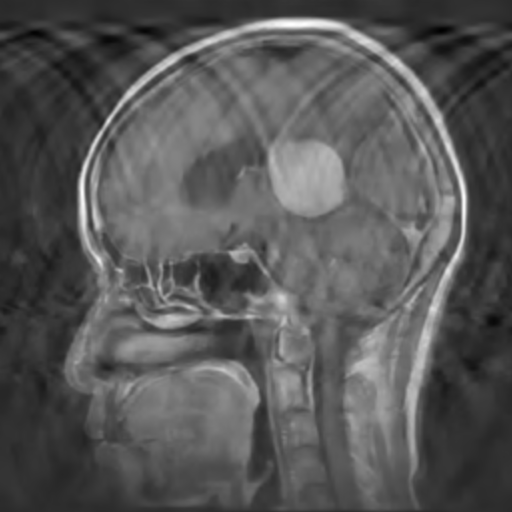

In [12]:
min_val = minimum(CW3_DATA.Q8_2_4_ans_Xhat)
max_val = maximum(CW3_DATA.Q8_2_4_ans_Xhat)
normalized_M1 = (CW3_DATA.Q8_2_4_ans_Xhat .- min_val) ./ (max_val - min_val)
@show Gray.(normalized_M1)

## 8.3. Blind Deconvolution: Convex Relaxation

### 1

The augement Lagrangian can be written as 
$$
\begin{equation*}
    \frac{1}{2}\|y-A(X1)\|^2+\lambda _1\|X_2\|_{*}+\lambda _2\|X_3^{\mathsf{T}}\|_{2, 1}+\lambda _3\|X_4\|_{2,1} + U_2^{\mathsf{T}}(X_2-X_1)+\frac{\rho}{2}\|X_2-X_1\|_F^2+
\end{equation*}
$$
$$
\begin{equation*}
    U_3^{\mathsf{T}}(X_3-X_1[2:m, 1:n]+X_1[1:m-1, 1:n])+\frac{\rho}{2}\|X_3-X_1[2:m, 1:n]+X_1[1:m-1, 1:n]\|_F^2 + U_4^{\mathsf{T}}(X_4-X_1)+\frac{\rho}{2}\|X_4-X_1\|_F^2
\end{equation*}
$$

### 2

In this case, the gradient with respect to $X_1$ can be written as 
$$
\begin{equation*}
    A^{\mathsf{T}}AX_1+2\rho X_1+\rho F^{\mathsf{T}}FX_1 = A^{\mathsf{T}}y+U_2+\rho X_2+F^{\mathsf{T}}U_3 + \rho F^{\mathsf{T}}X_3 + U_4 + \rho X_4
\end{equation*}
$$

In [13]:
function Find_Vector_for_cycconv(n)
    Vec = zeros(n*n)
    Vec[1] = 1
    for i in 2:n
        Vec[(i-1)*n+1+n-(i-1)] = 1
    end
    return Vec
end

function Find_AX_cycconv(Vec, X, n)
    mn = length(X)
    y = zeros(n)
    Vec_l = copy(Vec)
    Vec_seg = zeros(n)
    y[1] = sum(Vec.*X)
    for i in 2:n
        Vec_seg = copy(Vec_l[mn-n+1:mn])
        Vec_l[n+1:mn] = copy(Vec_l[1:mn-n])
        Vec_l[1:n] = copy(Vec_seg)
        y[i] = sum(Vec_l.*X)
    end
    return y
end

function Find_ATX_cycconv(y, m, n)
    n_max = max(m, n)
    x = zeros(n_max*n_max)
    AT = Matrix(I, n_max, n_max)
    x[1:n_max] = AT*y
    for i in 2:n_max
        AT_seg = copy(AT[1, 1:n_max])
        AT[1:n_max-1, 1:n_max] = copy(AT[2:n_max, 1:n_max])
        AT[n_max, 1:n_max] = copy(AT_seg)
        x[(i-1)*n_max+1:i*n_max] = AT*y
    end
    if m == n
        x_out = copy(x)
    elseif m > n
        x_out = copy(x[1:m*n])
    else 
        x_pre_M = Vector2Matrix(x, n)
        x_out_M = x_pre_M[1:m, 1:n]
        x_out = Matrix2Vector(x_out_M)
    end
    return x_out
end
# Z = [1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0; 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0; 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1; 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0]
# x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
# y_check = Z*x
# x_check = Z'*y_check
# display(x_check)
# check = Find_ATX_cycconv(Find_AX_cycconv(Find_Vector_for_cycconv(4), x, 4), 4)
# display(check)
function Get_new_cyclic_matrix_m_larger_n(x, m, n)
    x_new = zeros(m*m)
    x_new[1:m*n] = x
    h = m-n
    for i in 1:h
        i_new = mod(i-1, n)+1
        x_new[m*n+1+(i-1)*m:m*n+1+(i-1)*m+(m-1)] = x[(i_new-1)*m+1:i_new*m]
    end
    return x_new
end

function Get_new_cyclic_matrix_m_smaller_n(x, m, n)
    X_new = zeros(n, n)
    X_l = Vector2Matrix(x, m)
    X_new[1:m, 1:n] = X_l
    h = n-m
    for i in 1:h
        i_new = mod(i-1, m)+1
        X_new[m+i, 1:n] = X_l[i_new, 1:n]
    end
    return Matrix2Vector(X_new)
end

# x_test = [1 2 3; 4 5 6; 7 8 9; 10 11 12; 13 14 15; 16 17 18; 19 20 21]
# x_test_vec = Matrix2Vector(x_test)
# display(x_test_vec)
# Get_new_cyclic_matrix_m_larger_n(x_test_vec, 7, 3)
function Find_AX_for_LinearOperator(x, F, rho, m, n, Vec)
    if m == n
        ATAx = Find_ATX_cycconv(Find_AX_cycconv(Vec, x, n), m, n)
    elseif m > n
        x_new = Get_new_cyclic_matrix_m_larger_n(x, m, n)
        ATAx = Find_ATX_cycconv(Find_AX_cycconv(Vec, x_new, m), m, n)
    else
        x_new = Get_new_cyclic_matrix_m_smaller_n(x, m, n)
        ATAx_pre = Find_ATX_cycconv(Find_AX_cycconv(Vec, x_new, n), m, n)
        ATAx_pre_M = Vector2Matrix(ATAx_pre, n)
        ATAx_M = ATAx_pre_M[1:m, 1:n]
        ATAx = Matrix2Vector(ATAx_M)
    end

    return ATAx+2*rho*x+Matrix2Vector(rho*F'*F*Vector2Matrix(x, m))
end

function Find_b_8_3(y, m, n, U2, rho, X2, F, U3, X3, U4, X4)
    return Find_ATX_cycconv(y, m, n)+Matrix2Vector(U2+rho*X2+F'*U3+rho*F'*X3+U4+rho*X4)
end

function Update_X1_8_3(y, U2, rho, X2, F, U3, X3, U4, X4, Vec)
    m, n = size(X2)
    l = m*n
    A_linearoperator = LinearOperator(Float64, l, l, false, false, (Ax, x) -> Ax .= Find_AX_for_LinearOperator(x, F, rho, m, n, Vec))
    b = Find_b_8_3(y, m, n, U2, rho, X2, F, U3, X3, U4, X4)
    x1_out = cg(A_linearoperator, b)
    X1 = Vector2Matrix(x1_out, m)
    return X1
end

rho = 15
# CW3_DATA.Q8_3_data_X2_ini
# CW3_DATA.Q8_3_data_y
CW3_DATA.Q8_3_2_ans_X1 = Update_X1_8_3(CW3_DATA.Q8_3_data_y, CW3_DATA.Q8_3_data_U2_ini, CW3_DATA.Q8_2_data_rho, CW3_DATA.Q8_3_data_X2_ini, gen_F(200), CW3_DATA.Q8_3_data_U3_ini, CW3_DATA.Q8_3_data_X3_ini, CW3_DATA.Q8_3_data_U4_ini, CW3_DATA.Q8_3_data_X4_ini, Find_Vector_for_cycconv(200))

200×10 Matrix{Float64}:
  0.0437516  -0.279176    0.427803  …  -0.108153   -0.30821     -0.210754
 -0.418903   -0.379654    0.922316      0.213338   -0.161749    -0.156359
  0.207846    0.0554809  -0.705635     -1.65249     0.52506     -1.00393
 -0.0565997   0.0253732  -0.64706      -0.86671    -1.31697      0.340697
  0.110635    0.645603    0.752325      0.302932   -0.669817    -0.113477
  1.58378     0.341921    0.514564  …   0.550354   -0.0287298   -0.428773
  0.293785    0.172897    0.547463      0.382782    0.117772    -0.0324515
  0.689       0.347426    0.170333      0.280434   -1.28117      1.27691
  0.905242    0.704389   -0.77684      -0.389269   -0.664965     0.29512
  1.5394     -0.243065   -0.235455     -0.209666   -0.899107    -0.0557344
  ⋮                                 ⋱                           
  0.246888   -0.184102    0.971165     -0.29988    -0.513822     0.0507802
 -0.699177   -0.387284   -0.253231      0.117647    0.519731    -0.445838
  0.278821    0.362576 

### 3

#### Update X2
Considering about updating $X_2$, the terms related to $X_2$ is 
$$
\begin{equation*}
    \lambda _1\|X_2\|_{*}+ U_2^{\mathsf{T}}(X_2-X_1)+\frac{\rho}{2}\|X_2-X_1\|_F^2
\end{equation*}
$$
which can be rewritten as 
$$
\begin{equation*}
    \lambda _1\|X_2\|_{*}+ \frac{\rho}{2}\|X_2-X_1+\frac{1}{\rho}U_2\|_F^2-\frac{1}{2\rho}\|U_2\|^2
\end{equation*}
$$
Therefore, for $X_2$, the objective function should be 
$$
\begin{equation*}
    \lambda _1\|X_2\|_{*}+ \frac{\rho}{2}\|X_2-X_1+\frac{1}{\rho}U_2\|_F^2
\end{equation*}
$$
Assuming $Z=X_1-\frac{1}{\rho}U_2$, this optimize problem has the closed form solution. First do the SVD decomposition to $Z$ to get $U$, $V$, and $\Sigma$, and then the closed form solution can be written as 
$$
\begin{equation*}
    \sum _{i=1}^{min(m, n)}max(\sigma _i-\frac{\lambda _1}{\rho}, 0)u_iv_i^{\mathsf{T}}
\end{equation*}
$$

#### Update X3
Now considering about the update of $X_3$, the terms related to $X_3$ is 
$$
\begin{equation*}
    \lambda _2\|X_3^{\mathsf{T}}\|_{2, 1}+U_3^{\mathsf{T}}(X_3-X_1[2:m, 1:n]+X_1[1:m-1, 1:n])+\frac{\rho}{2}\|X_3-X_1[2:m, 1:n]+X_1[1:m-1, 1:n]\|_F^2
\end{equation*}
$$
which can be rewritten as 
$$
\begin{equation*}
    \lambda _2\|X_3^{\mathsf{T}}\|_{2, 1}+\frac{\rho}{2}\|X_3-FX_1+\frac{1}{\rho}U_3\|_F^2-\frac{1}{2\rho}\|U_3\|^2
\end{equation*}
$$
Therefore, the minimization problem of $X_3$ becomes
$$
\begin{equation*}
    \lambda _2\|X_3^{\mathsf{T}}\|_{2, 1}+\frac{\rho}{2}\|X_3-FX_1+\frac{1}{\rho}U_3\|_F^2
\end{equation*}
$$
Now considering about $\|X_3^{\mathsf{T}}\|_{2, 1}$, since $\|X\|_{2,1} = \sum _{i=1}^n\|X[:, n]\|_2$, and since we have a transpose here, it can be seen that this can be rewritten as 
$$
\begin{equation*}
    \lambda _2\sum _{i=1}^m\|X_3[i, :]\|_2
\end{equation*}
$$
Therefore the objective function of $X_3$ becomes
$$
\begin{equation*}
    \lambda _2\sum _{i=1}^m\|X_3[i, :]\|_2 + \frac{\rho}{2}\|X_3-FX_1+\frac{1}{\rho}U_3\|_F^2
\end{equation*}
$$
This objective function doesn't have a closed form solution, so the proximal gradient method would be used to update $X_3$ iteratively. Now assuming $f(x) = \lambda _2\sum _{i=1}^m\|X_3[i, :]\|_2$, and $g(x)=\frac{\rho}{2}\|X_3-FX_1+\frac{1}{\rho}U_3\|_F^2$, so we first need to find the derivative of $f(x)$, this term can be written as 
$$
\begin{equation*}
    \lambda _2 \sum _{i=1}^m(X3[i, :]X3[i, :]^{\mathsf{T}})^{\frac{1}{2}}
\end{equation*}
$$
which can be reformed as 
$$
\begin{equation*}
    \lambda _2 \sum _{i=1}^m(\sum _{j=1}^n X_3[i, j]^2)^{\frac{1}{2}}
\end{equation*}
$$
Therefore the gradient of this function with respect to $X_3$ is 
$$
\begin{equation*}
    \begin{bmatrix}
        \frac{X_3[1, 1]}{norm(X_3[1, :])} & \frac{X_3[1, 2]}{norm(X_3[1, :])} & \cdots & \frac{X_3[1, n]}{norm(X_3[1, :])}\\
        \frac{X_3[2, 1]}{norm(X_3[2, :])} & \frac{X_3[2, 2]}{norm(X_3[2, :])} & \cdots & \frac{X_3[2, n]}{norm(X_3[2, :])}\\
        \vdots & \vdots & &\\
        \frac{X_3[m, 1]}{norm(X_3[m, :])} & \frac{X_3[m, 2]}{norm(X_3[m, :])} & \cdots & \frac{X_3[m, 1]}{norm(X_3[m, :])}
    \end{bmatrix}
\end{equation*}
$$
Therefore, after finding the gradient of this part, the proximal operator would be
$$
\begin{equation*}
    \frac{\rho}{2}\|X_3-FX_1+\frac{1}{\rho}U_3\|_F^2 + \frac{1}{2\gamma}\|X_3-(X_3^{l-1}-\gamma \nabla f(X_3))\|^2
\end{equation*}
$$
let $Z = FX_1-\frac{1}{\rho}U_3$, and $\hat{Z} = X_3^{l-1}-\gamma \nabla f(X_3)$, then the proximal operator is just a least square problem, the closed form solution is 
$$
\begin{equation*}
    X_3 = \frac{1}{\rho + \frac{1}{\gamma}}\left(\rho Z + \frac{1}{\gamma}\hat{Z}\right)
\end{equation*}
$$

#### Update X4
The terms related to $X_4$ is 
$$
\begin{equation*}
    \lambda _3\|X_4\|_{2,1}+U_4^{\mathsf{T}}(X_4-X_1)+\frac{\rho}{2}\|X_4-X_1\|_F^2
\end{equation*}
$$
which can be rewritten as 
$$
\begin{equation*}
    \lambda _3\|X_4\|_{2,1}+\frac{\rho}{2}\|X_4-X_1+\frac{1}{\rho}U_4\|_F^2 - \frac{1}{2\rho}\|U_4\|^2
\end{equation*}
$$
Therefore, the objective function becomes
$$
\begin{equation*}
    \lambda _3\|X_4\|_{2,1}+\frac{\rho}{2}\|X_4-X_1+\frac{1}{\rho}U_4\|_F^2
\end{equation*}
$$
The basic procedure is same as $X_3$ by using proximal gradient. The only difference is the gradient of $\lambda _3\|X_4\|_{2, 1}$ with respect to $X_4$. The representation of $\lambda _3\|X_4\|_{2, 1}$ is now 
$$
\begin{equation*}
    \lambda _3\sum _{j=1}^n\|X_4[:, j]\|_2
\end{equation*}
$$
which can be expanded as 
$$
\begin{equation*}
    \lambda _3\sum _{j=1}^n\left(\sum _{i=1}^mX_4[i, j]^2\right)^{\frac{1}{2}}
\end{equation*}
$$
Therefore the gradient is now
$$
\begin{equation*}
    \begin{bmatrix}
        \frac{\lambda _3X_4[1, 1]}{norm(X_4[:, 1])} & \frac{\lambda _3X_4[1, 2]}{norm(X_4[:, 2])} & \cdots & \frac{\lambda _3X_4[1, n]}{norm(X_4[:, n])}\\
        \frac{\lambda _3X_4[2, 1]}{norm(X_4[:, 1])} & \frac{\lambda _3X_4[2, 2]}{norm(X_4[:, 2])} & \cdots & \frac{\lambda _3X_4[2, n]}{norm(X_4[:, n])}\\
        \vdots & \vdots & &\\
        \frac{\lambda _3X_4[m, 1]}{norm(X_4[:, 1])} & \frac{\lambda _3X_4[m, 2]}{norm(X_4[:, 2])} & \cdots & \frac{\lambda _3X_4[m, n]}{norm(X_4[:, n])}
    \end{bmatrix}
\end{equation*}
$$

In [14]:
function Update_X2_8_3(X1, lambda1, rho, U2)
    gamma = inv(rho)
    Z = X1-gamma*U2
    F = svd(Z)
    S_new = max.((F.S).-(lambda1*gamma), 0)
    Z2 = F.U*Diagonal(S_new)*F.Vt
    return Z2
end

function Find_Gradient_fx_X3_8_3(X3, lambda2)
    row_norms = [norm(row) for row in eachrow(X3)]
    return lambda2*(X3./row_norms)
end

function Proximal_Gradient_X3_8_3(X1, U3, F, rho, gamma, Z_l)
    Z = F*X1-inv(rho)*U3
    return inv(rho+inv(gamma))*(rho*Z+inv(gamma)*Z_l)
end

function Update_X3_8_3(rho, X1, F, U3, lambda2, X3_pre)
    m, n = size(U3)
    gamma = 1/(2*n)
    X3_l = copy(X3_pre)
    X3_cur = copy(X3_l)
    X3_dif = Inf
    while (X3_dif > 0.0001)
        Z_l = X3_l - gamma*Find_Gradient_fx_X3_8_3(X3_l, lambda2)
        X3_l = Proximal_Gradient_X3_8_3(X1, U3, F, rho, gamma, Z_l)
        X3_dif = norm(X3_l-X3_cur)
        X3_cur = copy(X3_l)
    end
    return X3_l
end

function Find_Gradient_fx_X4_8_3(X4, lambda3)
    column_norms = [norm(col) for col in eachcol(X4)]
    return lambda3*(X4./transpose(column_norms))
end

function Proximal_Gradient_X4_8_3(X1, U4, rho, gamma, Z_l)
    Z = X1-inv(rho)*U4
    return inv(rho+inv(gamma))*(rho*Z+inv(gamma)*Z_l)
end

function Update_X4_8_3(rho, X1, U4, lambda3, X4_pre)
    m, n = size(U4)
    gamma = 1/(2*n)
    X4_l = copy(X4_pre)
    X4_cur = copy(X4_l)
    X4_dif = Inf
    while (X4_dif > 0.0001)
        Z_l = X4_l - gamma*Find_Gradient_fx_X4_8_3(X4_l, lambda3)
        X4_l = Proximal_Gradient_X4_8_3(X1, U4, rho, gamma, Z_l)
        X4_dif = norm(X4_l-X4_cur)
        X4_cur = copy(X4_l)
    end
    return X4_l
end

rho = 15

CW3_DATA.Q8_3_3_ans_X2 = Update_X2_8_3(CW3_DATA.Q8_3_2_ans_X1, CW3_DATA.Q8_3_data_lambda1, rho, CW3_DATA.Q8_3_data_U2_ini)
CW3_DATA.Q8_3_3_ans_X3 = Update_X3_8_3(CW3_DATA.Q8_2_data_rho, CW3_DATA.Q8_3_2_ans_X1, gen_F(200), CW3_DATA.Q8_3_data_U3_ini, CW3_DATA.Q8_3_data_lambda2, CW3_DATA.Q8_3_data_X3_ini)
CW3_DATA.Q8_3_3_ans_X4 = Update_X4_8_3(CW3_DATA.Q8_2_data_rho, CW3_DATA.Q8_3_2_ans_X1, CW3_DATA.Q8_3_data_U4_ini, CW3_DATA.Q8_3_data_lambda3, CW3_DATA.Q8_3_data_X4_ini)
# X = [2 4 8; 2 4 8; 2 4 8]
# l = [1, 1, 2]
# X./transpose(l)
# # X./l
# row_norms = [norm(column) for column in eachcol(X)]


# CW3_DATA.Q8_3_data_X4_ini

200×10 Matrix{Float64}:
  0.0165434  -0.187626    0.436683  …  -0.188285  -0.385317    -0.22678
 -0.335312   -0.298709    0.958371      0.208183  -0.151586    -0.104479
  0.149749   -0.0371053  -0.714709     -1.66302    0.567342    -1.0071
 -0.133208   -0.033584   -0.7253       -0.75415   -1.39033      0.267793
  0.170863    0.678674    0.703923      0.191863  -0.670253    -0.195794
  1.56236     0.35179     0.578751  …   0.577014  -0.00561421  -0.500521
  0.298533    0.259987    0.558087      0.449552   0.0838139   -0.0339576
  0.800148    0.448956    0.178445      0.320747  -1.23826      1.32485
  0.941047    0.719734   -0.803133     -0.345034  -0.654037     0.23425
  1.62361    -0.312028   -0.117691     -0.264659  -0.92035     -0.0783774
  ⋮                                 ⋱                          
  0.183645   -0.154812    0.875037     -0.266222  -0.698404    -0.0681365
 -0.744541   -0.337595   -0.217291      0.17872    0.616103    -0.516535
  0.224661    0.224866    0.30056     

### 4

The update function of $U_2$ based on ADMM algorithm is 
$$
\begin{equation*}
    U_2^{k+1} = U_2^k-\rho(X_1^k-X_2^k)
\end{equation*}
$$
And the update function of $U_3$ should be 
$$
\begin{equation*}
    U_3^{k+1} = U_3^k-\rho(FX_1^k-X_3^k)
\end{equation*}
$$
The update function of $U_4$ should be 
$$
\begin{equation*}
    U_4^{k+1} = U_4^k-\rho(X_1^k-X_4^k)
\end{equation*}
$$

In [15]:
function update_U2_8_3(U2_pre, rho, X1, X2)
    return U2_pre-rho*(X1-X2)
end

function update_U3_8_3(U3_pre, F, rho, X1, X3)
    return U3_pre-rho*(F*X1-X3)
end

function update_U4_8_3(U4_pre, rho, X1, X4)
    return U4_pre-rho*(X1-X4)
end

CW3_DATA.Q8_3_4_ans_U2 = update_U2_8_3(CW3_DATA.Q8_3_data_U2_ini, CW3_DATA.Q8_2_data_rho, CW3_DATA.Q8_3_2_ans_X1, CW3_DATA.Q8_3_3_ans_X2)
CW3_DATA.Q8_3_4_ans_U3 = update_U3_8_3(CW3_DATA.Q8_3_data_U3_ini, gen_F(200), CW3_DATA.Q8_2_data_rho, CW3_DATA.Q8_3_2_ans_X1, CW3_DATA.Q8_3_3_ans_X3)
CW3_DATA.Q8_3_4_ans_U4 = update_U4_8_3(CW3_DATA.Q8_3_data_U4_ini, CW3_DATA.Q8_2_data_rho, CW3_DATA.Q8_3_2_ans_X1, CW3_DATA.Q8_3_3_ans_X4)

200×10 Matrix{Float64}:
 -0.000173673   0.00240225   -0.00572465  …   0.00443403    0.00309516
  0.00404304    0.00383297   -0.01255         0.00175152    0.00141951
 -0.0018083     0.000492877   0.009373       -0.00655454    0.0137913
  0.00163339    0.000481854   0.00946932      0.0159967    -0.00362779
 -0.00204267   -0.00870598   -0.00921136      0.00767034    0.00266806
 -0.0187851    -0.00449511   -0.00757231  …   6.66741e-5    0.00683954
 -0.00354237   -0.00333454   -0.00728702     -0.000930165   0.000498746
 -0.00959578   -0.00573986   -0.00231293      0.014218     -0.0181121
 -0.011352     -0.00928928    0.0104555       0.00751173   -0.00320145
 -0.0195234     0.00402292    0.00160046      0.010603      0.00105358
  ⋮                                       ⋱                
 -0.00225818    0.00199293   -0.0113915       0.00801571    0.000923425
  0.00891412    0.00436061    0.00286317     -0.0070833     0.00703301
 -0.00269322   -0.00284037   -0.00398227     -0.0019583     0.00

### 5

The primal residual in this case is 
$$
\begin{equation*}
\begin{align*}
    r_2^{k+1} &= X_1^{k+1}-X_2^{k+1}\\
    r_3^{k+1} &= FX_1^{k+1}-X_3^{k+1}\\
    r_4^{k+1} &= X_1^{k+1}-X_4^{k+1}
\end{align*}
\end{equation*}
$$
The dual residual in this case is 
$$
\begin{equation*}
\begin{align*}
    s_2^{k+1} &= \rho(X_2^{k}-X_2^{k+1})\\
    s_3^{k+1} &= \rho F^{\mathsf{T}}(X_3^{k}-X_3^{k+1})\\
    s_4^{k+1} &= \rho (X_4^{k}-X_4^{k+1})\\
    
\end{align*}
\end{equation*}
$$

In [16]:
function Find_r_8_3(X1_k1, X2_k1, X3_k1, X4_k1, F)
    r_2 = X1_k1-X2_k1
    r_3 = F*X1_k1-X3_k1
    r_4 = X1_k1-X4_k1
    # norm1 = norm(r_2+r_3)
    # norm2 = norm(r_4+r_5)
    # r = norm(norm1^2+norm2^2)
    r = sqrt(sum(r_2.^2)+sum(r_3.^2)+sum(r_4.^2))
    # r = norm(r_2)+norm(r_3)+norm(r_4)+norm(r_5)
    # r = sqrt(sum(r_2.^2)+sum(r_3.^2))
    return r
end

function Find_s_8_3(rho, X2_k1, X2_k, X3_k1, X3_k, X4_k1, X4_k, F)
    s2 = rho*(X2_k-X2_k1)
    s3 = rho*F'*(X3_k-X3_k1)
    s4 = rho*(X4_k-X4_k1)
    # s = norm(s2+s3+s4+s5)
    # s = sqrt(sum(s2.^2)+sum(s3.^2)+sum(s4.^2))
    s = sqrt(sum(s2.^2)+sum(s4.^2))
    # s = norm(s2) + norm(s3) + norm(s4) + norm(s5)
    return s
end

function ADMM_8_3(rho, y, X1, X2, X3, X4, U2, U3, U4, lambda1, lambda2, lambda3)
    m, n = size(X1)
    F = gen_F(m)
    vec = Find_Vector_for_cycconv(m)
    
    X1_l = copy(X1)
    X2_l = copy(X2)
    X3_l = copy(X3)
    X4_l = copy(X4)
    U2_l = copy(U2)
    U3_l = copy(U3)
    U4_l = copy(U4)

    X2_cur = copy(X2_l)
    X3_cur = copy(X3_l)
    X4_cur = copy(X4_l)
    
    r = Inf
    s = Inf
    itr = 1
    # while (((r > 0.001) || (s > 0.001)) && (itr < 200))
    # s_c = zeros(14)
    # r_c = zeros(14)
    # while (itr < 15)
    while (((r > 0.001) || (s > 0.001)) && (itr < 200))
        X1_l = Update_X1_8_3(y, U2_l, rho, X2_l, F, U3_l, X3_l, U4_l, X4_l, vec)
        X2_l = Update_X2_8_3(X1_l, lambda1, rho, U2_l)
        X3_l = Update_X3_8_3(rho, X1_l, F, U3_l, lambda2, X3_l)
        X4_l = Update_X4_8_3(rho, X1_l, U4_l, lambda3, X4_l)
        U2_l = update_U2_8_3(U2_l, rho, X1_l, X2_l)
        U3_l = update_U3_8_3(U3_l, F, rho, X1_l, X3_l)
        U4_l = update_U4_8_3(U4_l, rho, X1_l, X4_l)
        r = Find_r_8_3(X1_l, X2_l, X3_l, X4_l, F)
        s = Find_s_8_3(rho, X2_l, X2_cur, X3_l, X3_cur, X4_l, X4_cur, F)
        # s_c[itr] = copy(s)
        # r_c[itr] = copy(r)
        X2_cur = copy(X2_l)
        X3_cur = copy(X3_l)
        X4_cur = copy(X4_l)
        itr += 1
    end
    return X1_l, itr, r, s
end

CW3_DATA.Q8_3_5_ans_Xhat, iteration, r_check, s_check = ADMM_8_3(CW3_DATA.Q8_2_data_rho, CW3_DATA.Q8_3_data_y, CW3_DATA.Q8_3_2_ans_X1, CW3_DATA.Q8_3_3_ans_X2, CW3_DATA.Q8_3_3_ans_X3, CW3_DATA.Q8_3_3_ans_X4, CW3_DATA.Q8_3_4_ans_U2, CW3_DATA.Q8_3_4_ans_U3, CW3_DATA.Q8_3_4_ans_U4, CW3_DATA.Q8_3_data_lambda1, CW3_DATA.Q8_3_data_lambda2, CW3_DATA.Q8_3_data_lambda3)
# display(s_check)
# display(r_check)
display(iteration)
display(r_check)
display(s_check)
    
    

In [ ]:
min_val = minimum(CW3_DATA.Q8_3_5_ans_Xhat)
max_val = maximum(CW3_DATA.Q8_3_5_ans_Xhat)
normalized_M1 = (CW3_DATA.Q8_3_5_ans_Xhat .- min_val) ./ (max_val - min_val)
@show Gray.(normalized_M1)

## 8.4. Blind Deconvolution

### 1

The function is 
$$
\begin{equation*}
    \frac{\alpha}{2}\|X_2-X_1\|^2+\frac{\alpha}{2}\|X_3-FX_1\|^2
\end{equation*}
$$
The Heissian matrix is the second derivation of the above function to $X_1$, which is 
$$
\begin{equation*}
    \alpha(I + F^{\mathsf{T}}F)
\end{equation*}
$$

In [ ]:
function Find_Hessian_Matrix_1(alpha, X2)
    m = length(X2)
    F = gen_F(m)
    I = ones(m)
    return alpha*(Diagonal(I)+F'*F)
end

CW3_DATA.Q8_4_1_a_ans_H = Find_Hessian_Matrix_1(CW3_DATA.Q8_4_data_alpha, CW3_DATA.Q8_4_data_x2ini)

function Find_upper_bound_1(H)
    F = svd(H)
    return inv(F.S[1])
end

CW3_DATA.Q8_4_1_b_ans_tau = Find_upper_bound_1(CW3_DATA.Q8_4_1_a_ans_H)




The terms related to $x_1$ is 
$$
\begin{equation*}
    \frac{1}{2}\|y-x1\circledast _nh\|^2+\frac{\alpha}{2}\|x_2-x_1\|^2+\frac{\alpha}{2}\|x_3-Fx_1\|^2
\end{equation*}
$$
Here we assume $f(x) = \frac{\alpha}{2}\|x_2-x_1\|^2+\frac{\alpha}{2}\|x_3-Fx_1\|^2$, the gradient of this function with respect to $x_1$ is
$$
\begin{equation*}
    -\alpha(x_2-x_1)-\alpha F^{\mathsf{T}}(x_3-Fx_1)
\end{equation*}
$$
The proximal operator of this problem is 
$$
\begin{equation*}
    \frac{1}{2}\|y-Hx_1\|^2+\frac{1}{2\gamma}\|x_1-(x_1^{l-1}-\gamma\nabla f(x_1))\|^2
\end{equation*}
$$
The solution is 
$$
\begin{equation*}
    (H^{\mathsf{T}}H+\frac{1}{\gamma})x_1 = \frac{1}{\gamma}z+H^{\mathsf{T}}y
\end{equation*}
$$

In [ ]:
function Find_CyclicConvolution_Matrix(h)
    n = length(h)
    h_new = vcat(h[2:n], h)
    C = zeros(n, n)
    for i in 1:n
        C[i, :] = reverse(h_new[i:i+n-1])
    end
    return C
end

function Find_CyclicConvolution_Adjoint_matrix(h)
    C = Find_CyclicConvolution_Matrix(h)
    return adjoint(C)
end

function Find_gradient_x1_8_4(alpha, x2, x1, F, x3)
    return -alpha*(x2-x1)-alpha*F'*(x3-F*x1)
end

function proximal_gradient_x1_8_4(H, gamma, y, z)
    m, n = size(H)
    A = adjoint(H)*H+inv(gamma)*I(n)
    b = inv(gamma)*z+adjoint(H)*y
    return A \ b
end

function update_x1_8_4(x1, alpha, x2, x3, h, y, tao)
    n = length(x1)
    F = gen_F(n)
    m = length(h)
    h_new = zeros(n)
    h_new[1:m] = copy(h)
    H = Find_CyclicConvolution_Matrix(h_new)
    gamma = 0.8*tao
    x1_l = copy(x1)
    z_l = x1_l - gamma*Find_gradient_x1_8_4(alpha, x2, x1_l, F, x3)
    x1_l = proximal_gradient_x1_8_4(H, gamma, y, z_l)
    return x1_l
end

CW3_DATA.Q8_4_1_c_ans_x1 = update_x1_8_4(CW3_DATA.Q8_4_data_x1ini, CW3_DATA.Q8_4_data_alpha, CW3_DATA.Q8_4_data_x2ini, CW3_DATA.Q8_4_data_x3ini, CW3_DATA.Q8_4_data_h1ini, CW3_DATA.Q8_4_data_y, CW3_DATA.Q8_4_1_b_ans_tau)

    


The terms related to $x_2$ is 
$$
\begin{equation*}
    \delta(\|x_2\|^2=1) + \frac{\alpha}{2}\|x_2-x_1\|^2
\end{equation*}
$$
let $f(x)=\frac{\alpha}{2}\|x_2-x_1\|^2$, therefore the gradient of this is 
$$
\begin{equation*}
    \alpha(x_2-x_1)
\end{equation*}
$$
Therefore, the proximal operator in this case is 
$$
\begin{equation*}
    \delta(\|x_2\|^2=1) + \frac{1}{2\gamma}\|x_2-(x_2^{l-1}-\gamma\nabla f(x_2))\|^2
\end{equation*}
$$
Assuming $z = x_2^{l-1}-\gamma\nabla f(x_2)$. This form has the closed form solution based on Lagrange, which is 
$$
\begin{equation*}
    \bm{x} = \frac{\bm{z}}{\bm{1-2\gamma\frac{\bm{1-\sqrt{\|z\|^2}}}{2\bm{\gamma}}}} = \frac{\bm{z}}{\bm{\sqrt{\|z\|^2}}}
\end{equation*}
$$

In [ ]:
function Find_gradient_x2_8_4(alpha, x2, x1)
    return alpha*(x2-x1)
end

function proximal_gradient_x2_8_4(z, gamma)
    z_norm_sqrt = sqrt(z'*z)
    x = z/z_norm_sqrt
    return x
end

function update_x2_8_4(alpha, x2, x1, tau)
    x2_l = copy(x2)
    gamma = 0.8*tau
    z_l = x2_l - gamma*Find_gradient_x2_8_4(alpha, x2_l, x1)
    x2_l = proximal_gradient_x2_8_4(z_l, gamma)
    return x2_l
end

CW3_DATA.Q8_4_1_c_ans_x2 = update_x2_8_4(CW3_DATA.Q8_4_data_alpha, CW3_DATA.Q8_4_data_x2ini, CW3_DATA.Q8_4_1_c_ans_x1, CW3_DATA.Q8_4_1_b_ans_tau)

The terms related to $x_3$ is 
$$
\begin{equation*}
    \lambda _1\|x_3\|_0 + \frac{\alpha}{2}\|x_3-Fx_1\|^2
\end{equation*}
$$
The $f(x)$ in this case is $\frac{\alpha}{2}\|x_3-Fx_1\|^2$, therefore the gradient is 
$$
\begin{equation*}
    \alpha(x_3-Fx_1)
\end{equation*}
$$
Therefore, the proximal operator is 
$$
\begin{equation*}
    \lambda _1\|x_3\|_0 + \frac{1}{2\gamma}\|x_3-(x_3^{l-1}-\gamma\nabla f(x_3))\|^2
\end{equation*}
$$
which has the closed form solution derived in CW2

In [ ]:
function Find_gradient_x3_8_4(alpha, x3, F, x1)
    return alpha*(x3-F*x1)
end

function zero_norm(x)
    n = length(x)
    nz = 0
    for i in 1:n
        nz = (x[i] != 0) ? nz+1 : nz
    end
    return nz
end

function proximal_gradient_x3_8_4(z, gamma, lambda1)
    x_init = copy(z)
    gamma_inv = 1/(2*gamma*lambda1)
    nz = zero_norm(x_init)
    err = nz 
    # First sort the z to get the indexes based on its absolute value in descending order
    idx = sortperm(z, by=abs)
    n = length(z)
    # Set the k lowest absolute value element of x to zero
    err_vec = zeros(nz)
    x_min = copy(x_init)
    for i in 1:nz
        x_init[idx[i]] = 0
        err_cur = nz-i + gamma_inv*(transpose(x_init - z)*(x_init - z))
        err_vec[i] = copy(err_cur)
        if (err_cur < err)
            err = err_cur
            x_min = copy(x_init)
        end
    end
    return x_min
end

function update_x3_8_4(lambda1, alpha, x3, x1, tau)
    n = length(x1)
    F = gen_F(n)
    gamma = 0.8*tau
    x3_l = copy(x3)
    z_l = x3_l-gamma*Find_gradient_x3_8_4(alpha, x3_l, F, x1)
    x3_l = proximal_gradient_x3_8_4(z_l, gamma, lambda1)
    return x3_l
end

CW3_DATA.Q8_4_1_c_ans_x3 = update_x3_8_4(CW3_DATA.Q8_3_data_lambda1, CW3_DATA.Q8_4_data_alpha, CW3_DATA.Q8_4_data_x3ini, CW3_DATA.Q8_4_1_c_ans_x1, CW3_DATA.Q8_4_1_b_ans_tau)


#### Subgradient of x1
The terms related to $x_1$ is 
$$
\begin{equation*}
    \frac{1}{2}\|y-x_1\circledast _nh\|^2+\frac{\alpha}{2}\|x_2-x_1\|^2+\frac{\alpha}{2}\|x_3-Fx_1\|^2
\end{equation*}
$$
In this case, all the terms of $x_1$ are smooth and has the derivative, therefore the subgradient of $x_1$ is 
$$
\begin{equation*}
    -H^{\mathsf{T}}(y-Hx_1)-\alpha(x_2-x_1)-\alpha F^{\mathsf{T}}(x_3-Fx_1)
\end{equation*}
$$

#### Subgradient of x2
The terms related to $x_2$ is 
$$
\begin{equation*}
    \delta(\|x_2\|^2=1) + \frac{\alpha}{2}\|x_2-x_1\|^2
\end{equation*}
$$
It can be seen the second term is smooth, and the gradient is its subgradient, but for the first part, since we need to make sure that for all $\hat{x_2} s.t \|\hat{x_2}\|_2=1$, the subgradient is the set of vectors $v$, such that 
$$
\begin{equation*}
     \delta(\|x_2\|^2=1)- \delta(\|\hat{x_2}\|^2=1) \geq v^{\mathsf{T}}(x_2-\hat{x_2}) \ \ \rightarrow \ \ 0 \geq v^{\mathsf{T}}(x_2-\hat{x_2})
\end{equation*}
$$
Since we know that $v^{\mathsf{T}}(x_2-\hat{x_2}) \geq 0$, therefore we need to find $v$, such that $v$ is orthorgonal to the difference between $x_2$ and $\hat{x_2}$, the most obvious one is actually zero vector, therefore, the total subgradient is 
$$
\begin{equation*}
    \alpha(x_2-x_1)
\end{equation*}
$$

#### Subgradient of x3
The terms related to $x_3$ is 
$$
\begin{equation*}
    \lambda _1\|x_3\|_0 + \frac{\alpha}{2}\|x_3-Fx_1\|^2
\end{equation*}
$$
It can be seen that the second term is still smooth, therefore the subgradient is the gradient itself. But for the zero norm, since we want to find $v$ such that 
$$
\begin{equation*}
    \lambda _1\|y\|_0 \geq \lambda _1\|x_3\|_0 + v^{\mathsf{T}}(y-x_3), \ \ \forall v, y \in \mathbb{R}^n
\end{equation*}
$$
then
$$ 
\begin{equation*}
    \lambda _1n \geq \lambda _1\|x_3\|_0 + v^{\mathsf{T}}(y-x_3), \ \ \forall v, y \in \mathbb{R}^n
\end{equation*}
$$

and we know that $\|y\|_0$ must be $\leq n$, but we could always construct $y$ to be the form 
$$
\begin{equation*}
    y = \lambda _1n\frac{v}{\|v\|^2}+x_3
\end{equation*}
$$
In this case, 
$$
\begin{equation*}
    v^{\mathsf{T}}(y-x_3) = \lambda _1n
\end{equation*}
$$
Therefore, the above inequality would become
$$
\begin{equation*}
    \lambda _1n \geq \lambda _1\|x_3\|_0 + \lambda _1n
\end{equation*}
$$
But since normally $\|x_3\|_0$ is not equal to zero, then this inequality cannot be satisfied, therefore the only vector $v$ can do this is zero vector. Therefore the subgradient of zero norm is actually a zero vector, the the subgradient of $x_3$ in general is 
$$
\begin{equation*}
    \alpha(x_3-Fx_1)
\end{equation*}
$$

In [ ]:
function Subgradient_of_x1(y, x1, x2, x3, alpha, h)
    n = length(x1)
    m = length(h)
    h_new = zeros(n)
    h_new[1:m] = copy(h)
    F = gen_F(n)
    H = Find_CyclicConvolution_Matrix(h_new)
    return -H'*(y-H*x1)-alpha*(x2-x1)-alpha*F'*(x3-F*x1)
end

function Subgradient_of_x2(alpha, x2, x1)
    return alpha*(x2-x1)
end

function Subgradient_of_x3(alpha, x3, x1)
    n = length(x1)
    F = gen_F(n)
    return alpha*(x3-F*x1)
end


x1_subgradient = Subgradient_of_x1(CW3_DATA.Q8_4_data_y, CW3_DATA.Q8_4_data_x1ini, CW3_DATA.Q8_4_data_x2ini, CW3_DATA.Q8_4_data_x3ini, CW3_DATA.Q8_4_data_alpha, CW3_DATA.Q8_4_data_h1ini)
x2_subgradient = Subgradient_of_x2(CW3_DATA.Q8_4_data_alpha, CW3_DATA.Q8_4_data_x2ini, CW3_DATA.Q8_4_data_x1ini)
x3_subgradient = Subgradient_of_x3(CW3_DATA.Q8_4_data_alpha, CW3_DATA.Q8_4_data_x3ini, CW3_DATA.Q8_4_data_x1ini)
Q8_4_1_d_ans_subg = [x1_subgradient, x2_subgradient, x3_subgradient]

### 2

The Heissian matrix of $\frac{\alpha}{2}\|h_2-h_1\|^2$ is its second derivative, which is 
$$
\begin{equation*}
    \alpha I
\end{equation*}
$$

In [ ]:
function Find_Heissian_Matrix_2(alpha, h1)
    n = length(h1)
    H = alpha*Matrix(I(n))
    return H
end

CW3_DATA.Q8_4_2_a_ans_H = Find_Heissian_Matrix_2(CW3_DATA.Q8_4_data_alpha, CW3_DATA.Q8_4_data_h1ini)

function Find_upper_bound_2(H)
    F = svd(H)
    return inv(F.S[1])
end

CW3_DATA.Q8_4_2_b_ans_tau = Find_upper_bound_2(CW3_DATA.Q8_4_2_a_ans_H)



The terms related to $h_1$ is 
$$
\begin{equation*}
    \frac{1}{2}\|y-x1\circledast _nh_1\|^2 + \frac{\alpha}{2}\|h_2-h_1\|^2
\end{equation*}
$$
let $f(h_1) = \frac{\alpha}{2}\|h_2-h_1\|^2$, then the gradient is 
$$
\begin{equation*}
    -\alpha(h_2-h_1)
\end{equation*}
$$
The proximal operator is written as 
$$
\begin{equation*}
    \frac{1}{2}\|y-x1\circledast _nh_1\|^2 + \frac{1}{2\tau}\|h_1-(h_1^{l-1}-\tau\nabla f(h_1))\|^2 = \frac{1}{2}\|y-Ch_1\|^2 + \frac{1}{2\tau}\|h_1-z\|^2
\end{equation*}
$$
which has the closed form solution since they are two least square problems, the gradient is equal to 
$$
\begin{equation*}
    C^{\mathsf{T}}Ch_1 + \frac{1}{\tau}h_1 = C^{\mathsf{T}}y+\frac{1}{\tau}z
\end{equation*}
$$

In [ ]:
function Find_gradient_h1_8_4(alpha, h1, h2)
    return -alpha*(h2-h1)
end

function Find_Cyclic_Convulotion_withoutMatrix(x, h)
    n = length(x)
    k = DSP.conv(h, x)
    y = k[1:n] + vcat(k[(n+1):length(k)], 0)
    return y 
end

function Find_Cyclic_Convolution_Adjoint_withoutMatrix(y, h)
    n = length(h)
    h_new = vcat(h[1], reverse(h[2:n]))
    k = DSP.conv(h_new, y)
    z = k[1:n] + vcat(k[(n+1):length(k)], 0)
    return z  
end

function Find_Ah1_8_4(h1, x1, gamma)
    n = length(x1)
    m = length(h1)
    h_new = zeros(n)
    h_new[1:m] = copy(h1)
    return Find_Cyclic_Convolution_Adjoint_withoutMatrix(Find_Cyclic_Convulotion_withoutMatrix(x1, h_new), h_new)[1:m] + inv(gamma)*h1
end

function Find_b_8_4(y, h1, x1, gamma, z)
    n = length(x1)
    m = length(h1)
    h_new = zeros(n)
    h_new[1:m] = copy(h1)
    return Find_Cyclic_Convolution_Adjoint_withoutMatrix(y, h_new)[1:m] + inv(gamma)*z
end

function proximal_gradient_h1_8_4(h1, x1, y, gamma, z)
    m = length(h1)
    A_linearoperator = LinearOperator(Float64, m, m, false, false, (Ah, h) -> Ah .= Find_Ah1_8_4(h, x1, gamma))
    b = Find_b_8_4(y, h1, x1, gamma, z)
    return cg(A_linearoperator, b)
end

function update_h1_8_4(h1, x1, y, h2, alpha, tau)
    gamma = 0.8*tau
    h1_l = copy(h1)
    z_l = h1_l - gamma*Find_gradient_h1_8_4(alpha, h1_l, h2)
    h1_l = proximal_gradient_h1_8_4(h1_l, x1, y, gamma, z_l)
    return h1_l
end

CW3_DATA.Q8_4_2_c_ans_h1 = update_h1_8_4(CW3_DATA.Q8_4_data_h1ini, CW3_DATA.Q8_4_1_c_ans_x1, CW3_DATA.Q8_4_data_y, CW3_DATA.Q8_4_data_h2ini, CW3_DATA.Q8_4_data_alpha, CW3_DATA.Q8_4_2_b_ans_tau)


The terms related to $h_2$ is 
$$
\begin{equation*}
    \lambda _2\|h_2\|_0 + \frac{\alpha}{2}\|h_2-h_1\|^2
\end{equation*}
$$
Let $f(h_2) = \frac{\alpha}{2}\|h_2-h_1\|^2$, the gradient is 
$$
\begin{equation*}
    \alpha(h_2-h_1)
\end{equation*}
$$
Therefore, the proximal operator is 
$$
\begin{equation*}
    \lambda _2\|h_2\|_0 + \frac{1}{2\gamma}\|h_2-(h_2^{l-1}-\gamma\nabla f(h_2))\|^2
\end{equation*}
$$
which has the closed form solution just as $x_3$

In [ ]:
function Find_gradient_h2_8_4(alpha, h2, h1)
    return alpha*(h2-h1)
end

function zero_norm(x)
    n = length(x)
    nz = 0
    for i in 1:n
        nz = (x[i] != 0) ? nz+1 : nz
    end
    return nz
end

function proximal_gradient_h2_8_4(z, gamma, lambda2)
    x_init = copy(z)
    gamma_inv = 1/(2*gamma*lambda2)
    nz = zero_norm(x_init)
    err = nz 
    # First sort the z to get the indexes based on its absolute value in descending order
    idx = sortperm(z, by=abs)
    n = length(z)
    # Set the k lowest absolute value element of x to zero
    err_vec = zeros(nz)
    x_min = copy(x_init)
    for i in 1:nz
        x_init[idx[i]] = 0
        err_cur = nz-i + gamma_inv*(transpose(x_init - z)*(x_init - z))
        err_vec[i] = copy(err_cur)
        if (err_cur < err)
            err = err_cur
            x_min = copy(x_init)
        end
    end
    return x_min
end

function update_h2_8_4(lambda2, alpha, h2, h1, tau)
    gamma = 0.8*tau
    h2_l = copy(h2)
    z_l = h2_l-gamma*Find_gradient_h2_8_4(alpha, h2_l, h1)
    h2_l = proximal_gradient_h2_8_4(z_l, gamma, lambda2)
    return h2_l
end

CW3_DATA.Q8_4_2_c_ans_h2 = update_h2_8_4(CW3_DATA.Q8_3_data_lambda2, CW3_DATA.Q8_4_data_alpha, CW3_DATA.Q8_4_data_h2ini, CW3_DATA.Q8_4_2_c_ans_h1, CW3_DATA.Q8_4_2_b_ans_tau)


#### Subgradient of h1
The terms related to $h_1$ is 
$$
\begin{equation*}
    \frac{1}{2}\|y-x1\circledast _nh_1\|^2 + \frac{\alpha}{2}\|h_2-h_1\|^2
\end{equation*}
$$
It can be seen all these two terms are smooth, therefore the subgradient is just the gradient, which is 
$$
\begin{equation*}
    -C^{\mathsf{T}}(y-Ch_1)-\alpha(h_2-h_1)
\end{equation*}
$$

#### Subgradient of h2
The terms related to $h_2$ is 
$$
\begin{equation*}
    \lambda _2\|h_2\|_0 + \frac{\alpha}{2}\|h_2-h_1\|^2
\end{equation*}
$$
As derived above, the subgradient of zero norm term is zero, then the subgradient is 
$$
\begin{equation*}
    \alpha(h_2-h_1)
\end{equation*}
$$

In [ ]:
function Subgradient_of_h1(x1, h1, y, alpha, h2)
    n = length(x1)
    m = length(h1)
    h_new = zeros(n)
    h_new[1:m] = copy(h1)
    return -Find_Cyclic_Convolution_Adjoint_withoutMatrix(y-Find_Cyclic_Convulotion_withoutMatrix(x1, h_new), h_new)[1:m]-alpha*(h2-h1)
end

function Subgradient_of_h2(alpha, h2, h1)
    return alpha*(h2-h1)
end

h1_subgradient = Subgradient_of_h1(CW3_DATA.Q8_4_1_c_ans_x1, CW3_DATA.Q8_4_2_c_ans_h1, CW3_DATA.Q8_4_data_y, CW3_DATA.Q8_4_data_alpha, CW3_DATA.Q8_4_2_c_ans_h2)
h2_subgradient = Subgradient_of_h2(CW3_DATA.Q8_4_data_alpha, CW3_DATA.Q8_4_2_c_ans_h2, CW3_DATA.Q8_4_2_c_ans_h1)
CW3_DATA.Q8_4_2_d_ans_subg = [h1_subgradient, h2_subgradient]

### 3

In [ ]:
x1_subgradient_2 = Subgradient_of_x1(CW3_DATA.Q8_4_data_y, CW3_DATA.Q8_4_1_c_ans_x1, CW3_DATA.Q8_4_1_c_ans_x2, CW3_DATA.Q8_4_1_c_ans_x3, CW3_DATA.Q8_4_data_alpha, CW3_DATA.Q8_4_2_c_ans_h1)
x2_subgradient_2 = Subgradient_of_x2(CW3_DATA.Q8_4_data_alpha, CW3_DATA.Q8_4_1_c_ans_x2, CW3_DATA.Q8_4_1_c_ans_x1)
x3_subgradient_2 = Subgradient_of_x3(CW3_DATA.Q8_4_data_alpha, CW3_DATA.Q8_4_1_c_ans_x3, CW3_DATA.Q8_4_1_c_ans_x1)
CW3_DATA.Q8_4_3_ans_subg = [x1_subgradient_2, x2_subgradient_2, x3_subgradient_2]

### 4

In [ ]:
function Find_relative_error(X1_k1, X2_k1, X3_k1, h1, h2, F)
    r_2 = X1_k1-X2_k1
    r_3 = F*X1_k1-X3_k1
    r_4 = h2-h1
    # norm1 = norm(r_2+r_3)
    # norm2 = norm(r_4+r_5)
    # r = norm(norm1^2+norm2^2)
    r = sqrt(sum(r_2.^2)+sum(r_3.^2)+sum(r_4.^2))
    # r = norm(r_2)+norm(r_3)+norm(r_4)+norm(r_5)
    # r = sqrt(sum(r_2.^2)+sum(r_3.^2))
    return r
end

function Find_absolute_error(alpha, X1_kl, X1_k, X2_kl, X2_k, X3_kl, X3_k, h1_kl, h1_k, h2_kl, h2_k, F)
    s1 = alpha*(X1_k-X1_kl)
    s2 = alpha*(X2_k-X2_kl)
    s3 = alpha*F'*(X3_k-X3_kl)
    s4 = alpha*(h1_k-h1_kl)
    s5 = alpha*(h2_k-h2_kl)
    # s = norm(s2+s3+s4+s5)
    # s = sqrt(sum(s2.^2)+sum(s3.^2)+sum(s4.^2))
    s = sqrt(sum(s1.^2)+sum(s2.^2)+sum(s3.^2)+sum(s4.^2)+sum(s5.^2))
    # s = norm(s2) + norm(s3) + norm(s4) + norm(s5)
    return s
end

function alternating_update_8_4(x1, x2, x3, h1, h2, y, lambda1, lambda2, alpha, tau_x, tau_h)
    x1_l = copy(x1)
    x2_l = copy(x2)
    x3_l = copy(x3)
    h1_l = copy(h1)
    h2_l = copy(h2)
    x1_cur = copy(x1_l)
    x2_cur = copy(x2_l)
    x3_cur = copy(x3_l)
    h1_cur = copy(h1_l)
    h2_cur = copy(h2_l)
    n = length(x1)
    F = gen_F(n)
    abs_err = Inf
    rel_err = Inf
    itr = 1
    a = zeros(5)
    b = zeros(5)
    while ((abs_err > 0.01 || rel_err > 0.01) && itr < 500)
    # while (itr < 6)
        x1_l = update_x1_8_4(x1_l, alpha, x2_l, x3_l, h1_l, y, tau_x)
        x2_l = update_x2_8_4(alpha, x2_l, x1_l, tau_x)
        x3_l = update_x3_8_4(lambda1, alpha, x3_l, x1_l, tau_x)
        h1_l = update_h1_8_4(h1_l, x1_l, y, h2_l, alpha, tau_h)
        h2_l = update_h2_8_4(lambda2, alpha, h2_l, h1_l, tau_h)
        abs_err = Find_absolute_error(alpha, x1_cur, x1_l, x2_cur, x2_l, x3_cur, x3_l, h1_cur, h1_l, h2_cur, h2_l, F)
        rel_err = Find_relative_error(x1_l, x2_l, x3_l, h1_l, h2_l, F)
        x1_cur = copy(x1_l)
        x2_cur = copy(x2_l)
        x3_cur = copy(x3_l)
        h1_cur = copy(h1_l)
        h2_cur = copy(h2_l)
        # a[itr] = copy(abs_err)
        # b[itr] = copy(rel_err)
        itr += 1
    end
    return x1_l, h1_l, a, b, itr
end

CW3_DATA.Q8_4_4_ans_x1, CW3_DATA.Q8_4_4_ans_h1, a_c, b_c, itr = alternating_update_8_4(CW3_DATA.Q8_4_1_c_ans_x1, CW3_DATA.Q8_4_1_c_ans_x2, CW3_DATA.Q8_4_1_c_ans_x3, CW3_DATA.Q8_4_2_c_ans_h1, CW3_DATA.Q8_4_2_c_ans_h2, CW3_DATA.Q8_4_data_y, CW3_DATA.Q8_3_data_lambda1, CW3_DATA.Q8_3_data_lambda2, CW3_DATA.Q8_4_data_alpha, CW3_DATA.Q8_4_1_b_ans_tau, CW3_DATA.Q8_4_2_b_ans_tau)
# display(a_c)
# display(b_c)
display(itr)


In [ ]:
# save
jldopen("Jacky Jiang1860908StudentFile.jld2", "w") do file
    write(file, "CourseWork_3", CW3_DATA)
end